# Tugas Akhir KASDD - Kelompok Sebelah
Anggota:
1. Fitri 'Aliyah - 2006597115
2. Hanif Ibrahim Syuaib - 2006482003
3. Neiva Annur Syahistie - 2006531711
4. Ainun Nur Rohmah - 2006597052



# Business Understanding




Eksplorasi Data dilakukan untuk menjawab Pertanyaan berikut
1. Apa ciri-ciri pemain sepakbola yang memiliki biaya transfer minimum yang diatas rata-rata?
2. Apakah pemain dengan umur lebih dari umur 30 masih bermain dengan kerja keras yang tinggi?
3. Apakah terdapat hubungan antara posisi pemain sepakbola dengan tingkat skill-nya?
4. Apakah negara sepakbola dengan starting eleven terbaik?
5. Apakah pemain dengan nilai rating yang diatas rata-rata memiliki nilai special yang tinggi? 
6. Apa negara yang memiliki pemain dengan best overall rating tertinggi?

- Buatlah model untuk mengklasifikasi posisi dari seorang pemain sepakbola
- Buatlah model untuk memprediksi wage dari seorang pemain sepakbola
- Lakukan clustering pada dataset, dan berikan analisis dari jenis-jenis seorang pemain sepakbola yang terdapat dalam suatu cluster!

# Data Understanding

## Importing Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score, roc_auc_score

from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

## Data Description

In [4]:
df = pd.read_csv('football_player.csv')
df.head()

ID             Name  Age Nationality  Overall  Potential  \
0  212198  Bruno Fernandes   26    Portugal       88         89   
1  209658      L. Goretzka   26     Germany       87         88   
2  176580        L. Suárez   34     Uruguay       88         88   
3  192985     K. De Bruyne   30     Belgium       91         91   
4  224334         M. Acuña   29   Argentina       84         84   

   Best Overall Rating                Club    Value   Wage  ...  \
0                 88.0   Manchester United  €107.5M  €250K  ...   
1                 87.0   FC Bayern München     €93M  €140K  ...   
2                 88.0  Atlético de Madrid   €44.5M  €135K  ...   
3                 91.0     Manchester City  €125.5M  €350K  ...   
4                 84.0          Sevilla FC     €37M   €45K  ...   

  Standing Tackle Sliding Tackle GK Diving GK Handling  GK Kicking  \
0            73.0           65.0      12.0        14.0        15.0   
1            85.0           77.0      13.0         8.0        15.0   
2            45.0           38.0      27.0        25.0        31.0   
3            65.0           53.0      15.0        13.0         5.0   
4            84.0           82.0       8.0        14.0        13.0   

   GK Positioning GK Reflexes  Defensive Awareness  Attacking Work Rate  \
0             8.0        14.0                 72.0                 High   
1            11.0         9.0                 74.0                 High   
2            33.0        37.0                 42.0                 High   
3            10.0        13.0                 68.0                 High   
4            13.0        14.0                 80.0                 High   

   Defensive Work Rate  
0                 High  
1               Medium  
2               Medium  
3                 High  
4                 High  

[5 rows x 60 columns]

In [5]:
df.tail()

ID            Name  Age Nationality  Overall  Potential  \
16705  240558   18 L. Clayton   17     England       53         70   
16706  262846        �. Dobre   20     Romania       53         63   
16707  241317  21 Xue Qinghao   19    China PR       47         60   
16708  259646       A. Shaikh   18       India       47         67   
16709  178453   07 A. Censori   17       Italy       28         38   

       Best Overall Rating                   Club  Value  Wage  ...  \
16705                 52.0        Cheltenham Town  €100K   €1K  ...   
16706                 53.0  FC Academica Clinceni  €180K  €550  ...   
16707                 47.0    Shanghai Shenhua FC  €100K  €700  ...   
16708                 47.0     ATK Mohun Bagan FC  €110K  €500  ...   
16709                 36.0                 Arezzo     €0    €0  ...   

      Standing Tackle Sliding Tackle GK Diving GK Handling  GK Kicking  \
16705            11.0           12.0      55.0        54.0        52.0   
16706            13.0           12.0      57.0        52.0        53.0   
16707            11.0            9.0      49.0        48.0        45.0   
16708            14.0           13.0      49.0        41.0        39.0   
16709            16.0            NaN       7.0         1.0        36.0   

       GK Positioning GK Reflexes  Defensive Awareness  Attacking Work Rate  \
16705            50.0        59.0                  NaN               Medium   
16706            48.0        58.0                  5.0               Medium   
16707            38.0        52.0                 21.0               Medium   
16708            45.0        49.0                  7.0               Medium   
16709             6.0         9.0                  NaN                  NaN   

       Defensive Work Rate  
16705               Medium  
16706               Medium  
16707               Medium  
16708               Medium  
16709                  NaN  

[5 rows x 60 columns]

In [6]:
df.shape

(16710, 60)

In [7]:
def check_values(df):
    data = []
    for col in df.columns:
        data.append([col, \
                  df[col].dtype, \
                  df[col].isna().sum(), \
                  round(100*(df[col].isna().sum()/len(df)), 2), \
                  df[col].nunique(), \
                  df[col].unique()
                  ])
    
    return pd.DataFrame(columns=['kolom', 'dataType', 'null', 'nullPercentage', 'unique', 'values'], data=data)

In [8]:
check_values(df)

kolom dataType   null  nullPercentage  unique  \
0                         ID    int64      0            0.00   16710   
1                       Name   object      0            0.00   16089   
2                        Age    int64      0            0.00      30   
3                Nationality   object      0            0.00     168   
4                    Overall    int64      0            0.00      50   
5                  Potential    int64      0            0.00      48   
6        Best Overall Rating  float64      0            0.00      51   
7                       Club   object    264            1.58     869   
8                      Value   object      0            0.00     254   
9                       Wage   object      0            0.00     134   
10            Release Clause   object   1749           10.47    1170   
11                    Joined   object   1512            9.05    1975   
12      Contract Valid Until   object    351            2.10      56   
13                  Position   object      0            0.00       4   
14             Jersey Number  float64     26            0.16      99   
15                   Special    int64      0            0.00    1394   
16            Preferred Foot   object      0            0.00       2   
17  International Reputation  float64      0            0.00       5   
18                 Weak Foot  float64      0            0.00       5   
19               Skill Moves  float64      0            0.00       5   
20                 Body Type   object     29            0.17      10   
21                    Height   object      0            0.00      50   
22                    Weight   object      0            0.00      58   
23                  Crossing  float64      0            0.00      87   
24                 Finishing  float64      0            0.00      93   
25          Heading Accuracy  float64      0            0.00      88   
26             Short Passing  float64      0            0.00      85   
27                   Volleys  float64     37            0.22      87   
28                 Dribbling  float64      0            0.00      91   
29                     Curve  float64     37            0.22      89   
30               FK Accuracy  float64      0            0.00      91   
31              Long Passing  float64      0            0.00      84   
32              Ball Control  float64      0            0.00      88   
33              Acceleration  float64      0            0.00      84   
34              Sprint Speed  float64      0            0.00      83   
35                   Agility  float64     37            0.22      79   
36                 Reactions  float64      0            0.00      67   
37                   Balance  float64     37            0.22      78   
38                Shot Power  float64      0            0.00      82   
39                   Jumping  float64     37            0.22      72   
40                   Stamina  float64      0            0.00      85   
41                  Strength  float64      0            0.00      78   
42                Long Shots  float64      0            0.00      90   
43                Aggression  float64      0            0.00      85   
44             Interceptions  float64      8            0.05      89   
45               Positioning  float64      8            0.05      94   
46                    Vision  float64     37            0.22      85   
47                 Penalties  float64      0            0.00      89   
48                 Composure  float64    251            1.50      83   
49                   Marking  float64  15818           94.66      83   
50           Standing Tackle  float64      0            0.00      87   
51            Sliding Tackle  float64     37            0.22      88   
52                 GK Diving  float64      0            0.00      71   
53               GK Handling  float64      0            0.00      75   
54                GK Kicking  float64      0            0.00   

In [9]:
df.describe()

ID           Age       Overall     Potential  \
count   16710.000000  16710.000000  16710.000000  16710.000000   
mean   220560.467923     25.727409     67.646320     72.572292   
std     38496.607959      5.048910      6.457695      5.688085   
min        27.000000     16.000000     28.000000     38.000000   
25%    203891.250000     22.000000     63.000000     69.000000   
50%    229253.000000     25.000000     68.000000     72.000000   
75%    245368.750000     29.000000     72.000000     76.000000   
max    264704.000000     54.000000     93.000000     95.000000   

       Best Overall Rating  Jersey Number       Special  \
count         16710.000000   16684.000000  16710.000000   
mean             68.565410      20.458643   1652.497307   
std               6.256253      17.699813    257.271696   
min              36.000000       1.000000    571.000000   
25%              65.000000       8.000000   1525.000000   
50%              68.000000      17.000000   1687.000000   
75%              73.000000      27.000000   1826.000000   
max              93.000000      99.000000   2341.000000   

       International Reputation     Weak Foot   Skill Moves  ...  \
count              16710.000000  16710.000000  16710.000000  ...   
mean                   1.169958      3.008199      2.475464  ...   
std                    0.485305      0.681742      0.791414  ...   
min                    1.000000      1.000000      1.000000  ...   
25%                    1.000000      3.000000      2.000000  ...   
50%                    1.000000      3.000000      2.000000  ...   
75%                    1.000000      3.000000      3.000000  ...   
max                    5.000000      5.000000      5.000000  ...   

          Composure     Marking  Standing Tackle  Sliding Tackle  \
count  16459.000000  892.000000     16710.000000    16673.000000   
mean      61.001883   48.021300        49.155536       46.830564   
std       11.399833   21.904204        21.454857       21.175431   
min       12.000000    4.000000         3.000000        6.000000   
25%       55.000000   27.000000        29.000000       26.000000   
50%       62.000000   53.000000        57.000000       54.000000   
75%       69.000000   67.000000        67.000000       65.000000   
max       96.000000   94.000000        93.000000       95.000000   

          GK Diving   GK Handling    GK Kicking  GK Positioning   GK Reflexes  \
count  16710.000000  16710.000000  16710.000000    16710.000000  16710.000000   
mean      15.683662     15.521364     15.457989       15.581927     15.789228   
std       17.009757     16.302298     16.099993       16.584045     17.318251   
min        1.000000      1.000000      1.000000        1.000000      1.000000   
25%        8.000000      8.000000      8.000000        8.000000      8.000000   
50%       11.000000     11.000000     11.000000       11.000000     11.000000   
75%       14.000000     14.000000     14.000000       14.000000     14.000000   
max       91.000000     92.000000     93.000000       93.000000     90.000000   

       Defensive Awareness  
count         15818.000000  
mean             48.019408  
std              20.181354  
min               3.000000  
25%              30.000000  
50%              54.000000  
75%              65.000000  
max              93.000000  

[8 rows x 45 columns]

##Explore Data

###Numerical Data

In [10]:
def convert_to_float(value):
    if(isinstance(value, str)):
        if 'M' in value:
            return float(value[:-1]) * 10**6
        elif 'K' in value:
            return float(value[:-1]) * 10**3
        else:
            return float(value)

In [11]:
df['Value'] = df['Value'].str.replace('€', '').apply(convert_to_float)
df['Wage'] = df['Wage'].str.replace('€', '').apply(convert_to_float)
df['Release Clause'] = df['Release Clause'].str.replace('€', '').apply(convert_to_float)
df['Height'] = df['Height'].str.replace('cm', '').apply(convert_to_float)
df['Weight'] = df['Weight'].str.replace('kg', '').apply(convert_to_float)

In [12]:
num_cols = df.select_dtypes(include=['int', 'float']).drop(['International Reputation', 'Weak Foot', 'Skill Moves', 'ID', 'Jersey Number'], axis = 1)
print(num_cols.columns)

Index(['Age', 'Overall', 'Potential', 'Best Overall Rating', 'Value', 'Wage',
       'Release Clause', 'Special', 'Height', 'Weight', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Defensive Awareness'],
      dtype='object')


####Distribution

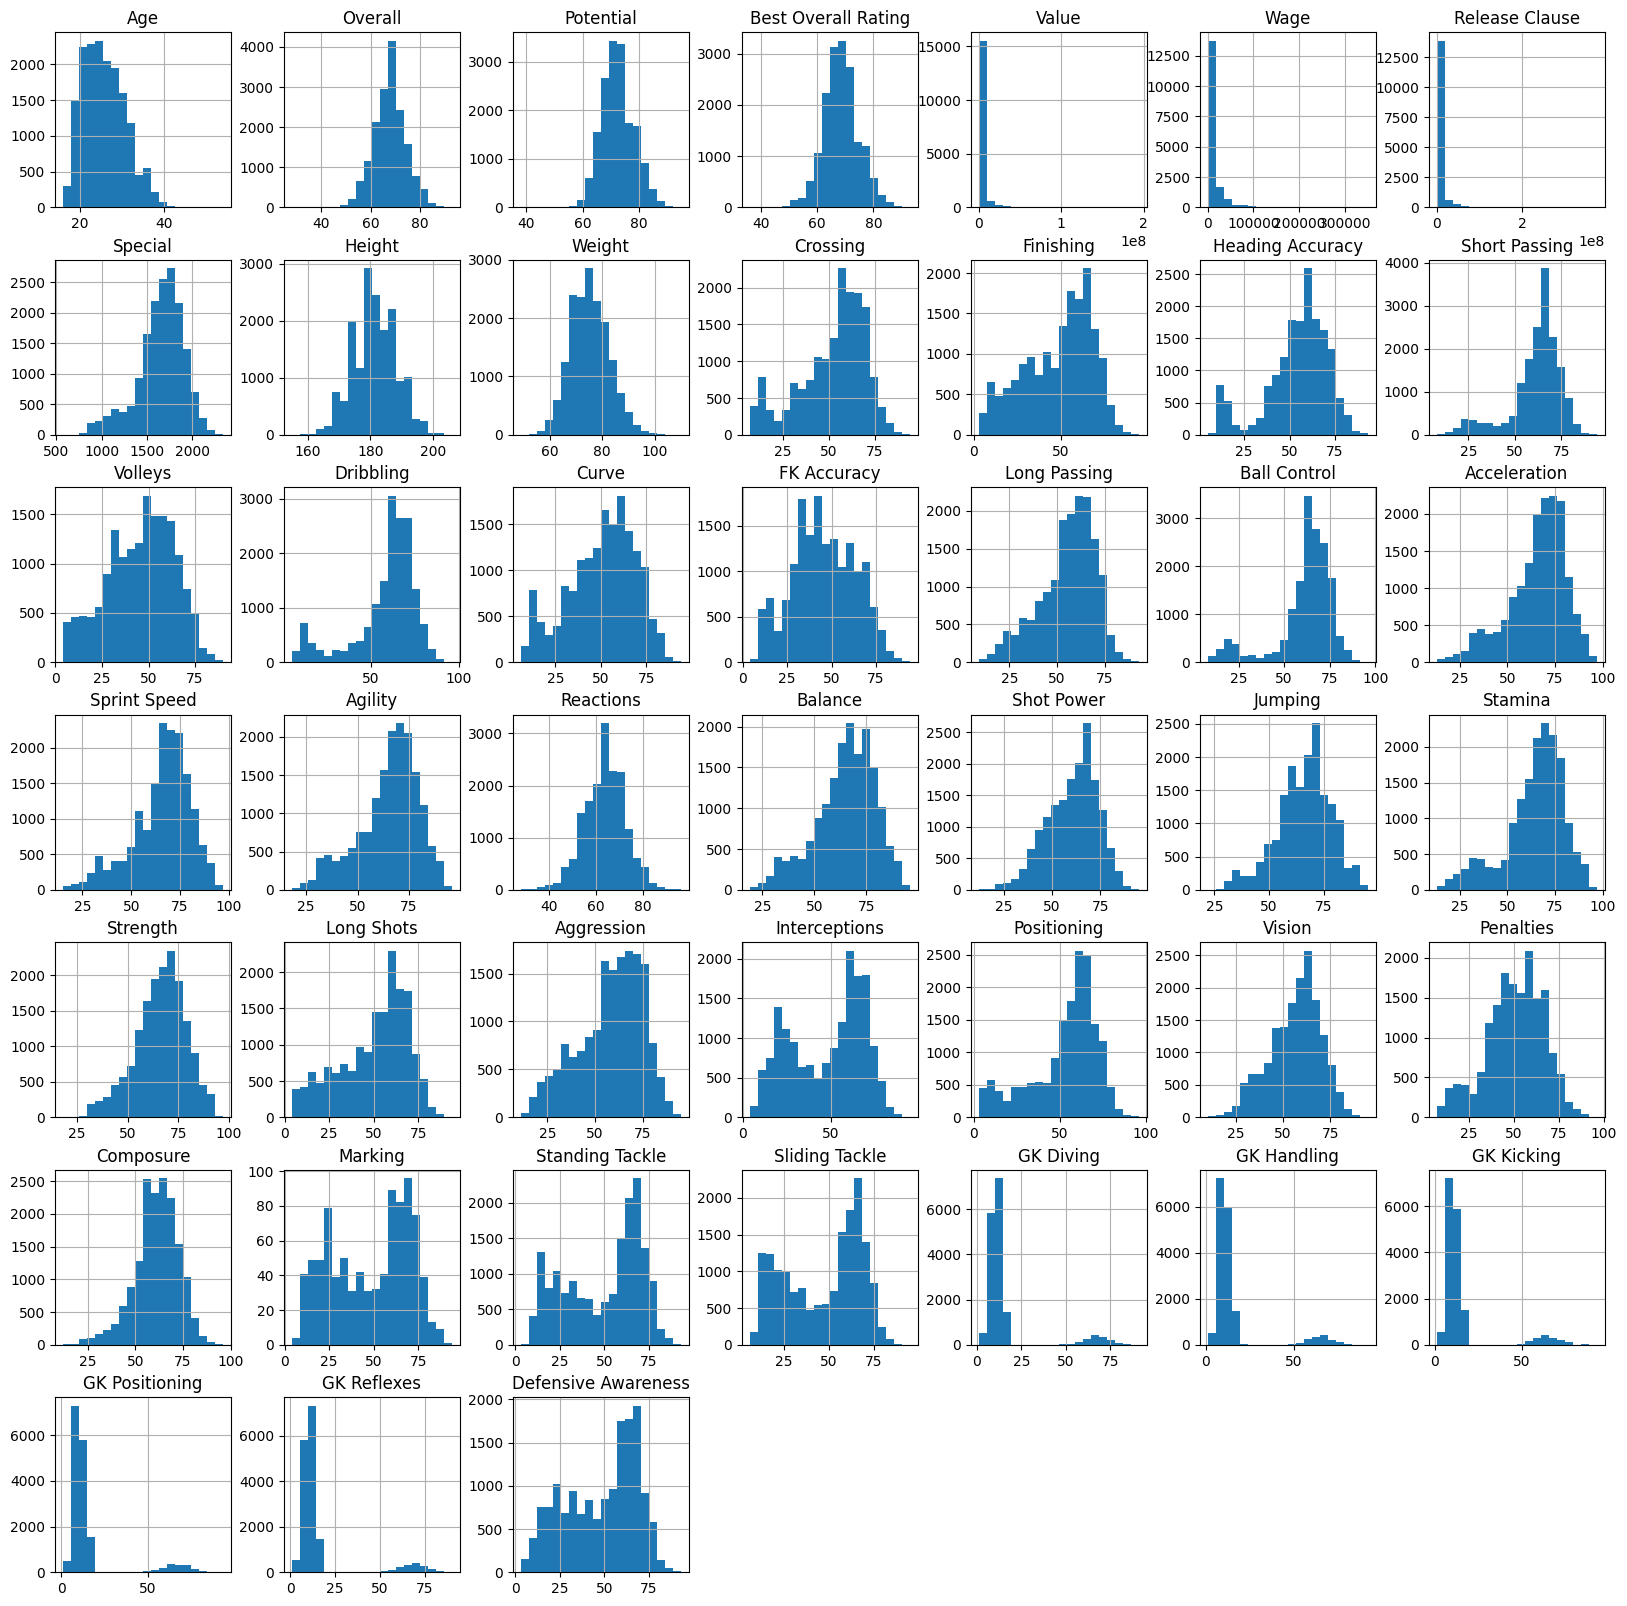

In [13]:
num_cols.hist(figsize=(20,20),bins=20)
plt.show()

Dapat dilihat pada visualisasi di sambing bahwa data cenderung skewed

####Check Outlier

In [14]:
Q3 = df.quantile(0.75)
Q1 = df.quantile(0.25)
IQR = Q3-Q1

Jumlah_Outlier = []

for col in num_cols.columns:
    outliers = ((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier.append([
        col, 
        outliers, 
        outliers/len(df)*100,
        df[col].min(),
        df[col].quantile(0.25),
        df[col].quantile(0.50),
        df[col].quantile(0.75),
        df[col].max()])
    
indexOutput = list(range(0, len(Jumlah_Outlier)))

pd.DataFrame(Jumlah_Outlier, columns=['Column', 'Outlier','OutlierPct', 'min', 'Q1', 'Q2', 'Q3', 'max'],index=indexOutput).sort_values(by=['OutlierPct'], ascending = False,ignore_index=True)

C:\Users\FITRI\AppData\Local\Temp\ipykernel_23028\2295352410.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\FITRI\AppData\Local\Temp\ipykernel_23028\2295352410.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)


Column  Outlier  OutlierPct      min          Q1         Q2  \
0                 Value     2091   12.513465      0.0   600000.00  1200000.0   
1        Release Clause     1844   11.035308  14000.0  1100000.00  2200000.0   
2                  Wage     1734   10.377020      0.0     2000.00     4000.0   
3             Dribbling     1714   10.257331      5.0       54.00       63.5   
4          Ball Control     1667    9.976062      8.0       58.00       65.0   
5            GK Kicking     1587    9.497307      1.0        8.00       11.0   
6           GK Reflexes     1553    9.293836      1.0        8.00       11.0   
7           GK Handling     1553    9.293836      1.0        8.00       11.0   
8        GK Positioning     1553    9.293836      1.0        8.00       11.0   
9             GK Diving     1550    9.275883      1.0        8.00       11.0   
10        Short Passing     1461    8.743268      8.0       57.00       64.0   
11     Heading Accuracy     1124    6.726511      5.0       46.00       57.0   
12         Sprint Speed      720    4.308797     15.0       59.00       68.0   
13              Stamina      712    4.260922     13.0       57.00       67.0   
14              Special      662    3.961700    571.0     1525.00     1687.0   
15          Positioning      623    3.728306      3.0       44.00       58.0   
16         Acceleration      448    2.681029     13.0       58.00       68.0   
17              Jumping      443    2.651107     22.0       59.00       67.0   
18            Composure      414    2.477558     12.0       55.00       62.0   
19             Strength      314    1.879114     18.0       59.00       68.0   
20            Potential      237    1.418312     38.0       69.00       72.0   
21              Balance      236    1.412328     19.0       57.00       67.0   
22            Reactions      232    1.388390     28.0       58.00       64.0   
23              Agility      228    1.364452     18.0       57.00       68.0   
24         Long Passing      215    1.286655      9.0       47.00       58.0   
25  Best Overall Rating      214    1.280670     36.0       65.00       68.0   
26              Overall      131    0.783962     28.0       63.00       68.0   
27           Shot Power      107    0.640335     12.0       52.00       62.0   
28               Vision       82    0.490724     10.0       48.00       58.0   
29               Weight       73    0.436864     49.0       70.00       75.0   
30               Height       49    0.293238    155.0      176.25      182.0   
31                  Age       43    0.257331     16.0       22.00       25.0   
32            Penalties       13    0.077798      7.0       41.00       52.0   
33             Crossing        8    0.047876      7.0       42.00       57.0   
34        Interceptions        0    0.000000      4.0       28.00       55.0   
35           Aggression        0    0.000000     11.0       47.00       61.0   
36           Long Shots        0    0.000000      4.0       37.00       55.0   
37              Marking        0    0.000000      4.0       27.00       53.0   
38      Standing Tackle        0    0.000000      3.0       29.00       57.0   
39       Sliding Tackle        0    0.000000      6.0       26.00       54.0   
40          FK Accuracy        0    0.000000      4.0       33.00       44.0   
41                Curve        0    0.000000      6.0       39.00       53.0   
42              Volleys        0    0.000000      4.0       33.00       48.0   
43            Finishing        0    0.000000      3.0       34.00       53.0   
44  Defensive Awareness        0    0.000000      3.0       30.00       54.0   

           Q3          max  
0   2500000.0  194000000.0  
1   4800000.0  373500000.0  
2     12000.0     350000.0  
3        70.0         96.0  
4        71.0         96.0  
5        14.0         93.0  
6        14.0         90.0  
7        14.0         92.0  
8        14.0         93.0  
9        14.0         91.0  
10       70.0    

In [15]:
df.sort_values(by=['GK Kicking'], ascending=False).head()

ID             Name  Age   Nationality  Overall  Potential  \
11192  210257          Ederson   27        Brazil       89         91   
12350  167495         M. Neuer   35       Germany       90         90   
14795  165247         I. Khune   34  South Africa       71         71   
10736   21570  14 Rogério Ceni   40        Brazil       75         75   
13890  192448    M. ter Stegen   29       Germany       90         92   

       Best Overall Rating               Club       Value      Wage  ...  \
11192                 89.0    Manchester City  94000000.0  200000.0  ...   
12350                 90.0  FC Bayern München  13500000.0   86000.0  ...   
14795                 71.0      Kaizer Chiefs    325000.0     500.0  ...   
10736                 75.0          São Paulo         0.0   30000.0  ...   
13890                 90.0       FC Barcelona  99000000.0  250000.0  ...   

       Standing Tackle Sliding Tackle GK Diving GK Handling  GK Kicking  \
11192             15.0            8.0      87.0        82.0        93.0   
12350             10.0           11.0      88.0        88.0        91.0   
14795             16.0           15.0      71.0        69.0        90.0   
10736             25.0           25.0      78.0        67.0        90.0   
13890             13.0           10.0      88.0        85.0        88.0   

       GK Positioning GK Reflexes  Defensive Awareness  Attacking Work Rate  \
11192            88.0        88.0                 29.0               Medium   
12350            89.0        88.0                 17.0               Medium   
14795            64.0        75.0                 17.0               Medium   
10736            84.0        70.0                  NaN               Medium   
13890            88.0        90.0                 25.0               Medium   

       Defensive Work Rate  
11192               Medium  
12350               Medium  
14795               Medium  
10736               Medium  
13890               Medium  

[5 rows x 60 columns]

Dengan menggunakan rumus IQR, RUB, dan LUB, didapatkan 34 dari 45 fitur numerik memiliki outlier. AKAN TETAPI, berdasarkan hasil temuan mengenai setiap fitur tersebut melalui sumber-sumber yang terpercaya dan asumsi tim, data dianggap NORMAL sehingga TIDAK PERLU DILAKUKAN HANDLE OUTLIER

Hasil temuan:
- Value: Dianggap normal karena walaupun range min dan max cukup jauh, pemain yang value-nya 0 adalah pemain yang tidak tergabung ke club manapun
Release Clause: Dianggap normal karena biaya transfer minimum pemain bisa bervariasi
- Wage: Dianggap normal karena walaupun range min dan max cukup jauh, pemain yang wage-nya 0 adalah pemain yang tidak tergabung ke club manapun
- Fitur terkait skill pemain: Dianggap normal karena berdasarkan fifaratings.com, range skill pemain sepak bola adalah 0-100 dan semua nilai skill pemain pada dataset berada pada range tersebut
- Weight: Dianggap normal karena jarak min dan max masih berada di range berat badan normal seseorang
- Height: Dianggap normal karena jarak min dan max masih berada di tinggi badan normal seseorang
- Age: Dianggap mormal karena usia pemain pada dataset tidak ada yang terlalu muda atau terlalu tua (nilai min = 16, nilai max = 54)
- Penalties: Dianggap normal karena jumlah penalti yang diterima setiap pemain sepak bola bisa sangat bervariasi



###Categorical Data

In [16]:
cat_cols = df.drop(num_cols, axis = 1)
print(cat_cols.columns)

Index(['ID', 'Name', 'Nationality', 'Club', 'Joined', 'Contract Valid Until',
       'Position', 'Jersey Number', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Body Type',
       'Attacking Work Rate', 'Defensive Work Rate'],
      dtype='object')


In [17]:
unique_nat = cat_cols['Nationality'].nunique()
print("Unique nationality:", unique_nat)

unique_club = cat_cols['Club'].nunique()
print("Unique club:", unique_club)

mode_nat = cat_cols['Nationality'].mode()[0]
print('Mode of Nationality:', mode_nat)

mode_club = cat_cols['Club'].mode()[0]
print('Mode of Club:', mode_club)

Unique nationality: 168
Unique club: 869
Mode of Nationality: England
Mode of Club: AC Milan


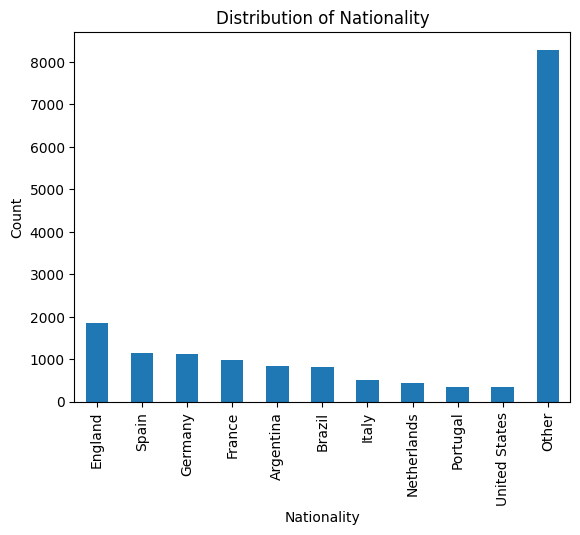

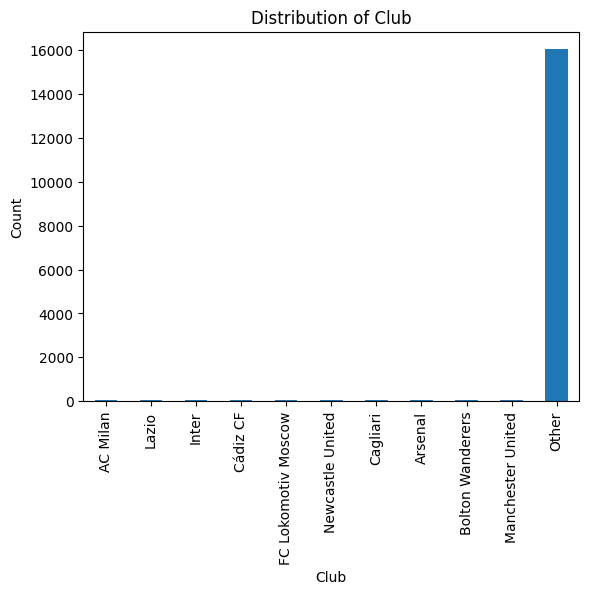

In [18]:
# Distribution of Nationality (only top 10 values are shown, rest are labeled as 'Other')
value_counts_nat = cat_cols['Nationality'].value_counts()

top_n = 10
top_values = value_counts_nat[:top_n].index.tolist()
other_count = value_counts_nat[top_n:].sum()

new_value_counts = pd.Series(value_counts_nat[top_values].tolist() + [other_count],
                             index=top_values + ['Other'])

ax = new_value_counts.plot(kind='bar')

ax.set_title("Distribution of Nationality")
ax.set_xlabel("Nationality")
ax.set_ylabel("Count")

plt.show()


# Distribution of Club (only top 10 values are shown, rest are labeled as 'Other')
value_counts_club = cat_cols['Club'].value_counts()

top_n = 10
top_values = value_counts_club[:top_n].index.tolist()
other_count = value_counts_club[top_n:].sum()

new_value_counts = pd.Series(value_counts_club[top_values].tolist() + [other_count],
                             index=top_values + ['Other'])

ax = new_value_counts.plot(kind='bar')

ax.set_title("Distribution of Club")
ax.set_xlabel("Club")
ax.set_ylabel("Count")

plt.show()

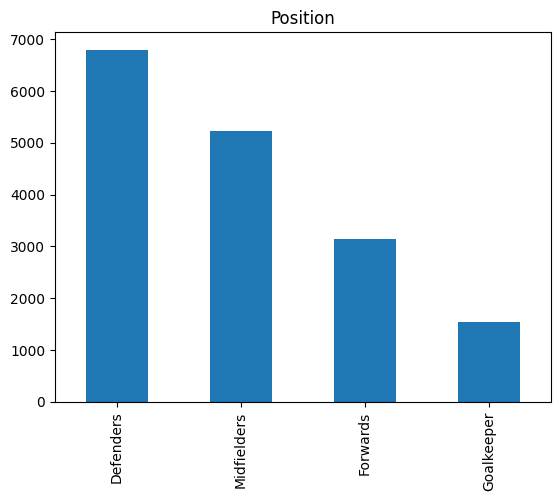

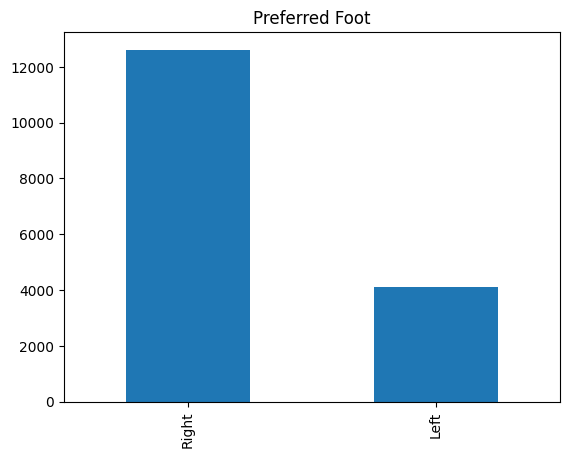

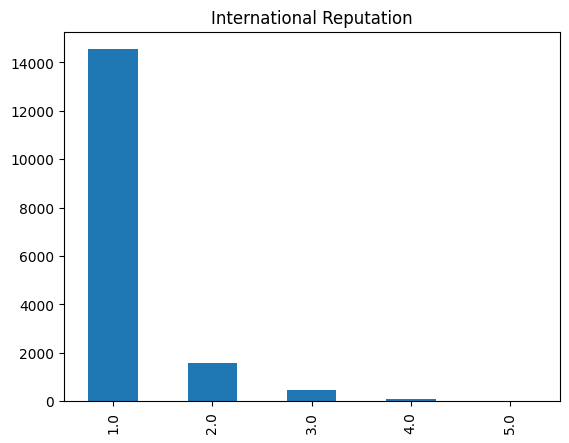

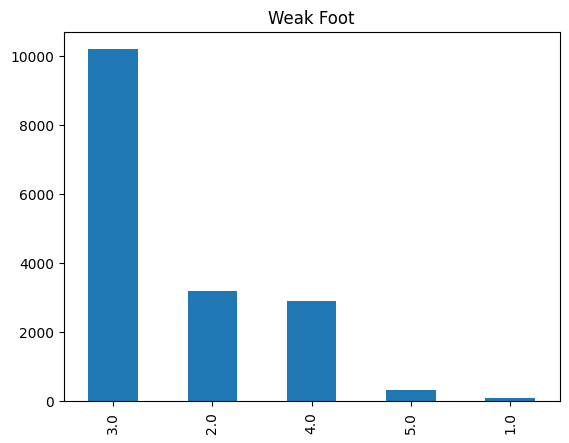

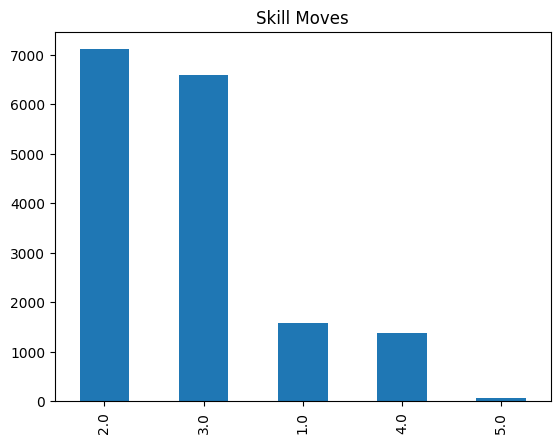

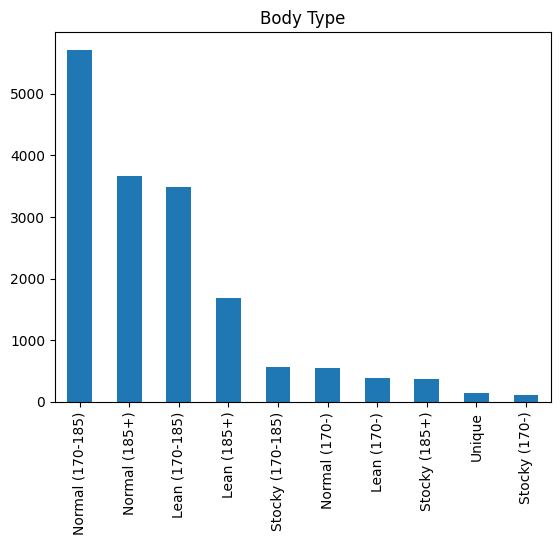

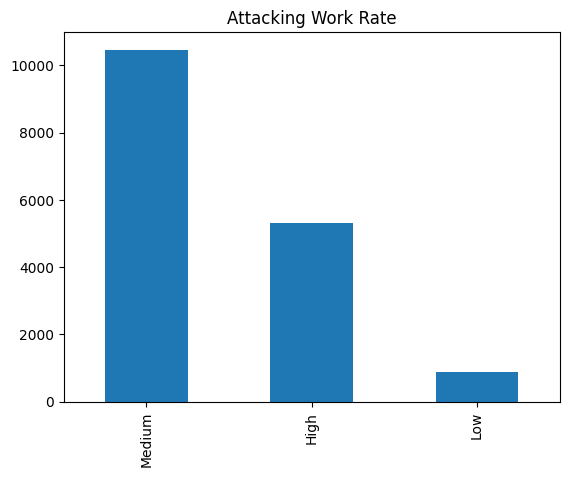

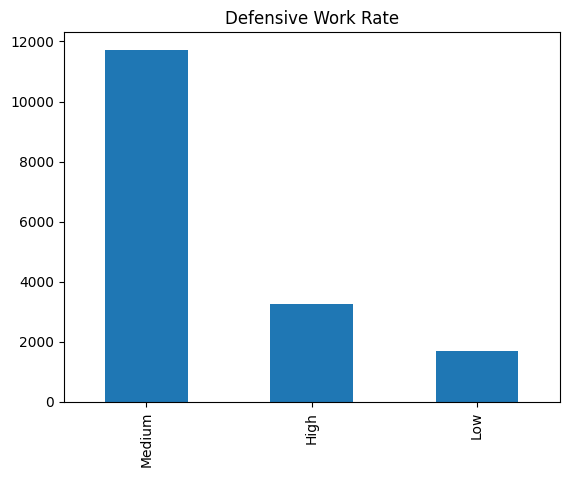

In [19]:
# Categorical data distribution (besides Nationality and Club) using bar chart
cat_new = cat_cols.drop(columns=['ID', 'Name', 'Joined', 'Contract Valid Until',
                                 'Jersey Number', 'Nationality', 'Club'])

for col in cat_new:
  cat_new[col].value_counts().plot(kind='bar')
  plt.title(col)
  plt.show()

## Identifikasi Korelasi Antar Fitur

C:\Users\FITRI\AppData\Local\Temp\ipykernel_23028\2321409045.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax=ax, annot=True)


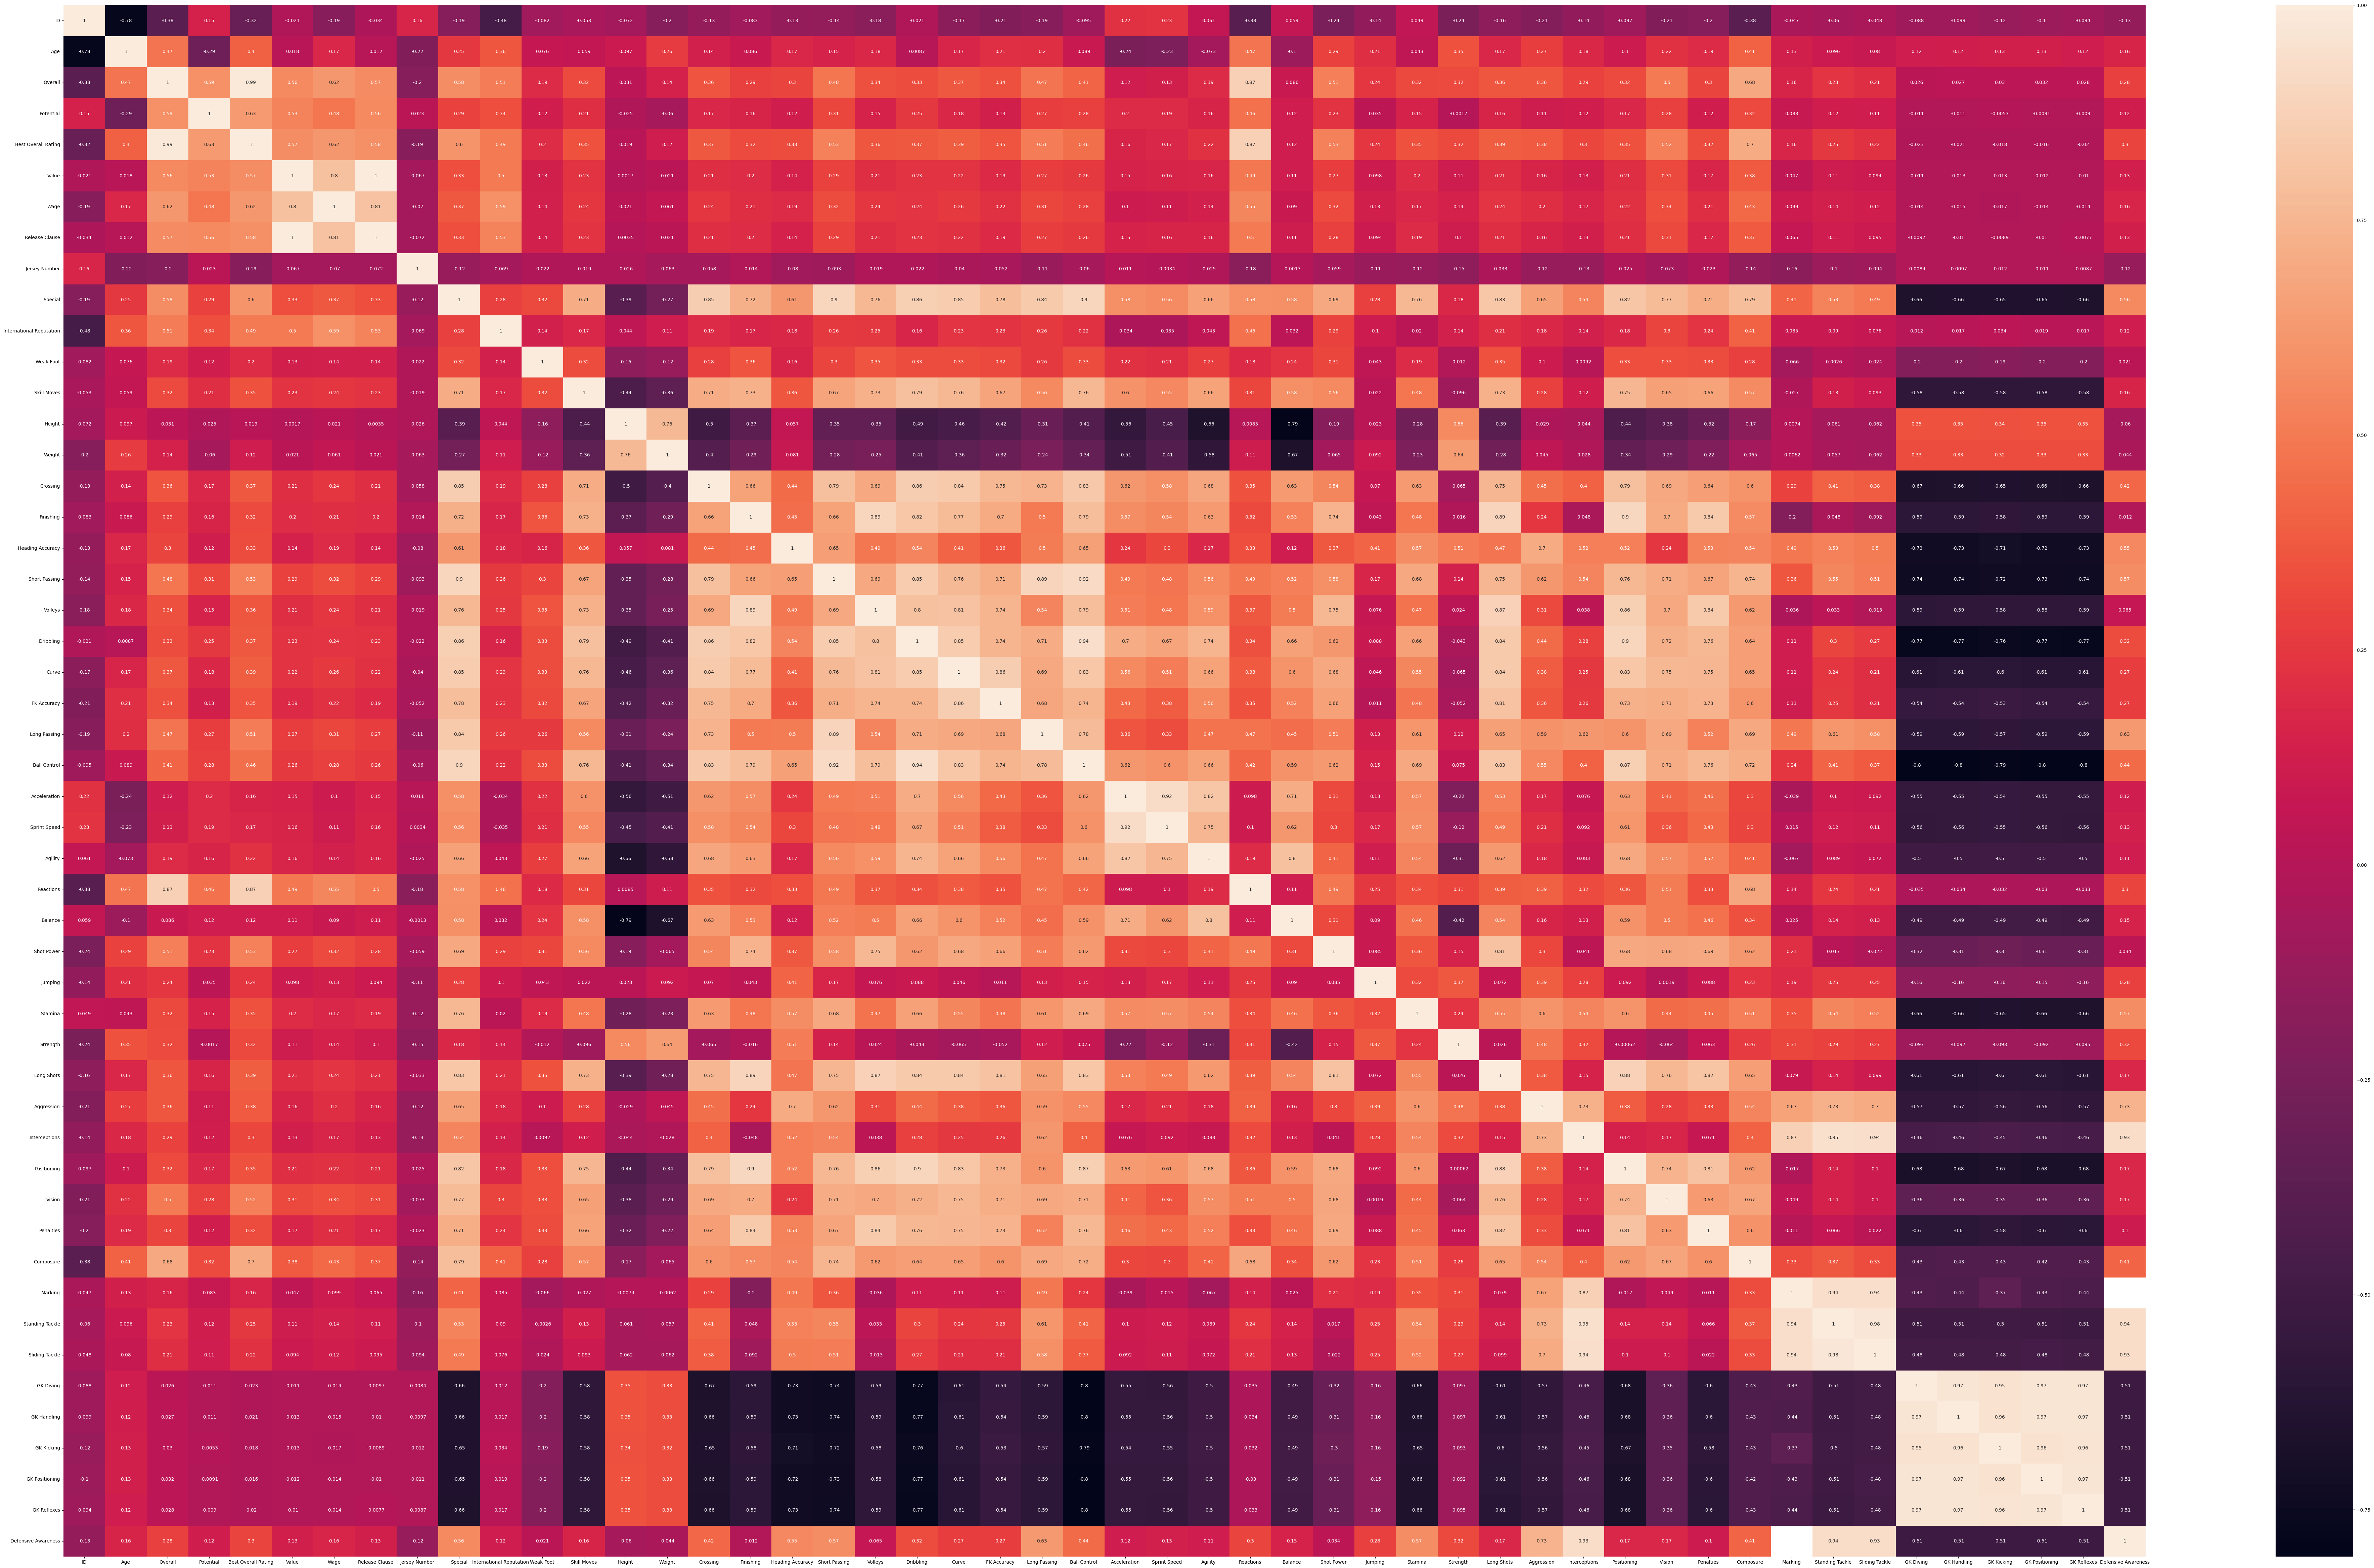

In [20]:
# Plot correlation matrix in heatmap
fig, ax = plt.subplots(figsize=(100, 60))
sns.heatmap(df.corr(), ax=ax, annot=True)
plt.show()

## Identifikasi Imbalanced Data

Class 0: 6795
Class 1: 5221
Class 2: 3148
Class 3: 1546


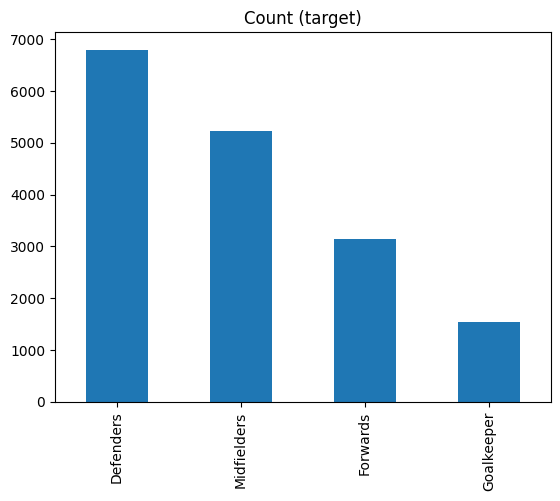

In [21]:
target_count = df.Position.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Class 2:', target_count[2])
print('Class 3:', target_count[3])

target_count.plot(kind='bar', title='Count (target)');

Berdasarkan visualisasi di samping, dapat diketahui bahwa dataset yang digunakan BALANCED sehingga TIDAK PERLU DILAKUKAN BALANCING data dengan menggunakan teknik sampling.

##Identifikasi Duplikasi Data

In [22]:
df.duplicated().value_counts()

False    16710
dtype: int64

Dataset TIDAK MEMILIKI DUPLIKASI data, sehingga TIDAK PERLU PENGHAPUSAN baris yang duplikat

# Data Preparation

## Handle Missing Values

Berdasarkan hasil pengecekan nilai null, kami memutuskan 2 hal, yaitu
1. Melakukan DROP pada fitur 'Marking' karena memiliki persentase null value sebesar 94,66%
2. Melakukan DROP pada seluruh baris fitur yang memiliki nilai null karena jumlah baris yang ada null hanya 2.312 baris atau 13,83% dari jumlah keseluruhan data

In [23]:
df.drop(['Marking'], axis=1, inplace=True)
check_values(df)

kolom dataType  null  nullPercentage  unique  \
0                         ID    int64     0            0.00   16710   
1                       Name   object     0            0.00   16089   
2                        Age    int64     0            0.00      30   
3                Nationality   object     0            0.00     168   
4                    Overall    int64     0            0.00      50   
5                  Potential    int64     0            0.00      48   
6        Best Overall Rating  float64     0            0.00      51   
7                       Club   object   264            1.58     869   
8                      Value  float64     0            0.00     254   
9                       Wage  float64     0            0.00     134   
10            Release Clause  float64  1749           10.47    1170   
11                    Joined   object  1512            9.05    1975   
12      Contract Valid Until   object   351            2.10      56   
13                  Position   object     0            0.00       4   
14             Jersey Number  float64    26            0.16      99   
15                   Special    int64     0            0.00    1394   
16            Preferred Foot   object     0            0.00       2   
17  International Reputation  float64     0            0.00       5   
18                 Weak Foot  float64     0            0.00       5   
19               Skill Moves  float64     0            0.00       5   
20                 Body Type   object    29            0.17      10   
21                    Height  float64     0            0.00      50   
22                    Weight  float64     0            0.00      58   
23                  Crossing  float64     0            0.00      87   
24                 Finishing  float64     0            0.00      93   
25          Heading Accuracy  float64     0            0.00      88   
26             Short Passing  float64     0            0.00      85   
27                   Volleys  float64    37            0.22      87   
28                 Dribbling  float64     0            0.00      91   
29                     Curve  float64    37            0.22      89   
30               FK Accuracy  float64     0            0.00      91   
31              Long Passing  float64     0            0.00      84   
32              Ball Control  float64     0            0.00      88   
33              Acceleration  float64     0            0.00      84   
34              Sprint Speed  float64     0            0.00      83   
35                   Agility  float64    37            0.22      79   
36                 Reactions  float64     0            0.00      67   
37                   Balance  float64    37            0.22      78   
38                Shot Power  float64     0            0.00      82   
39                   Jumping  float64    37            0.22      72   
40                   Stamina  float64     0            0.00      85   
41                  Strength  float64     0            0.00      78   
42                Long Shots  float64     0            0.00      90   
43                Aggression  float64     0            0.00      85   
44             Interceptions  float64     8            0.05      89   
45               Positioning  float64     8            0.05      94   
46                    Vision  float64    37            0.22      85   
47                 Penalties  float64     0            0.00      89   
48                 Composure  float64   251            1.50      83   
49           Standing Tackle  float64     0            0.00      87   
50            Sliding Tackle  float64    37            0.22      88   
51                 GK Diving  float64     0            0.00      71   
52               GK Handling  float64     0            0.00      75   
53                GK Kicking  float64     0            0.00      78   
54            GK Positioning  float64     0            0.00      81   
55               GK Reflexes  float64     0    

In [24]:
df.dropna(how = "any", axis = 0, inplace=True)
df.shape

(14398, 59)

In [25]:
check_values(df)

kolom dataType  null  nullPercentage  unique  \
0                         ID    int64     0             0.0   14398   
1                       Name   object     0             0.0   13863   
2                        Age    int64     0             0.0      27   
3                Nationality   object     0             0.0     166   
4                    Overall    int64     0             0.0      47   
5                  Potential    int64     0             0.0      46   
6        Best Overall Rating  float64     0             0.0      47   
7                       Club   object     0             0.0     805   
8                      Value  float64     0             0.0     249   
9                       Wage  float64     0             0.0     133   
10            Release Clause  float64     0             0.0    1147   
11                    Joined   object     0             0.0    1813   
12      Contract Valid Until   object     0             0.0      11   
13                  Position   object     0             0.0       4   
14             Jersey Number  float64     0             0.0      99   
15                   Special    int64     0             0.0    1377   
16            Preferred Foot   object     0             0.0       2   
17  International Reputation  float64     0             0.0       5   
18                 Weak Foot  float64     0             0.0       5   
19               Skill Moves  float64     0             0.0       5   
20                 Body Type   object     0             0.0      10   
21                    Height  float64     0             0.0      50   
22                    Weight  float64     0             0.0      58   
23                  Crossing  float64     0             0.0      87   
24                 Finishing  float64     0             0.0      93   
25          Heading Accuracy  float64     0             0.0      88   
26             Short Passing  float64     0             0.0      85   
27                   Volleys  float64     0             0.0      87   
28                 Dribbling  float64     0             0.0      91   
29                     Curve  float64     0             0.0      89   
30               FK Accuracy  float64     0             0.0      90   
31              Long Passing  float64     0             0.0      84   
32              Ball Control  float64     0             0.0      88   
33              Acceleration  float64     0             0.0      84   
34              Sprint Speed  float64     0             0.0      83   
35                   Agility  float64     0             0.0      79   
36                 Reactions  float64     0             0.0      66   
37                   Balance  float64     0             0.0      78   
38                Shot Power  float64     0             0.0      76   
39                   Jumping  float64     0             0.0      72   
40                   Stamina  float64     0             0.0      84   
41                  Strength  float64     0             0.0      77   
42                Long Shots  float64     0             0.0      90   
43                Aggression  float64     0             0.0      85   
44             Interceptions  float64     0             0.0      87   
45               Positioning  float64     0             0.0      94   
46                    Vision  float64     0             0.0      85   
47                 Penalties  float64     0             0.0      87   
48                 Composure  float64     0             0.0      83   
49           Standing Tackle  float64     0             0.0      86   
50            Sliding Tackle  float64     0             0.0      87   
51                 GK Diving  float64     0             0.0      70   
52               GK Handling  float64     0             0.0      69   
53                GK Kicking  float64     0             0.0      76   
54            GK Positioning  float64     0             0.0      77   
55               GK Reflexes  float64     0    

## Encode Data

In [26]:
df_cleaned = df.copy()

In [27]:
le = LabelEncoder()

for col in cat_cols.columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Data Visualization

## Pertanyaan 1

Apa ciri-ciri pemain sepakbola yang memiliki biaya transfer minimum yang diatas rata-rata?


Untuk menjawab pertanyaan ini, berikut langkah yang kami lakukan:
1. Mencari hubungan untuk setiap atribut numerik dan kategorikal dengan atribut Release Clause
2. Untuk atribut numerik menggunakan scatter plot dengan membagi nilai biaya transfer minimum yang di atas dan di bawah rata-rata dan melihat hubungannya dengan atribut numeric
3. Untuk atribut kategorical menggunakan pie chart. Pie chart dibuat dengan melihat hubungan biaya di atas rata-rata dengan atribut kategorikal.



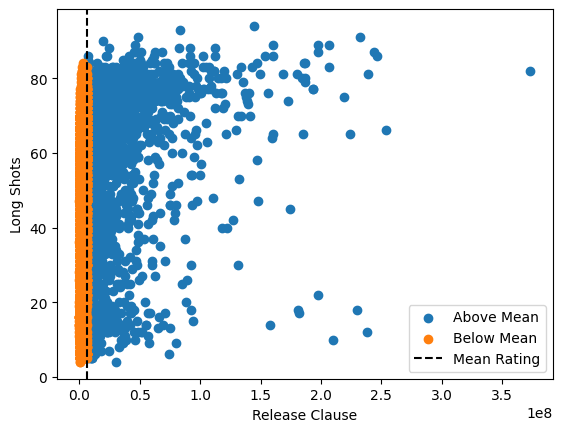

In [28]:
df_temp_3 = df[['Release Clause','Long Shots']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Long Shots'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Long Shots'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Long Shots')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

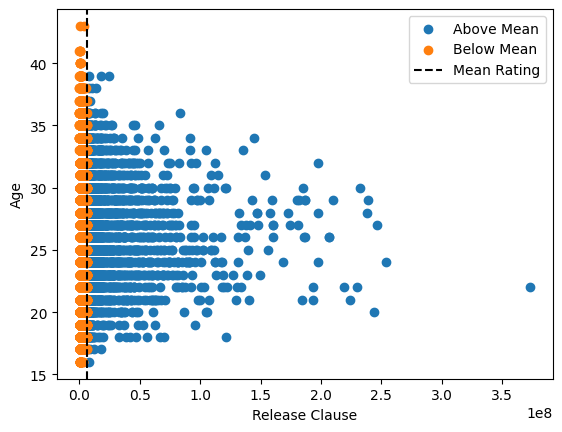

In [29]:
df_temp_3 = df[['Release Clause','Age']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Age'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Age'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Age')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

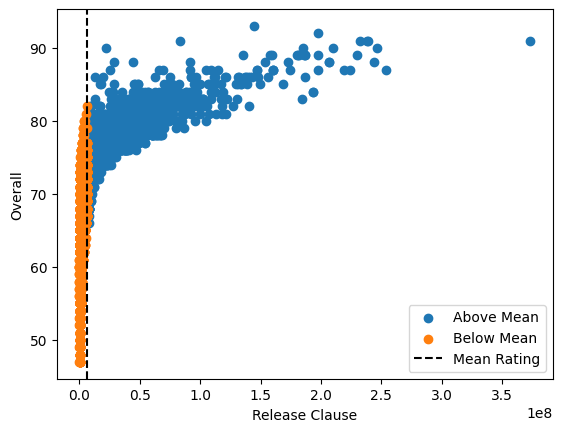

In [30]:
df_temp_3 = df[['Release Clause','Overall']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Overall'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Overall'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Overall')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

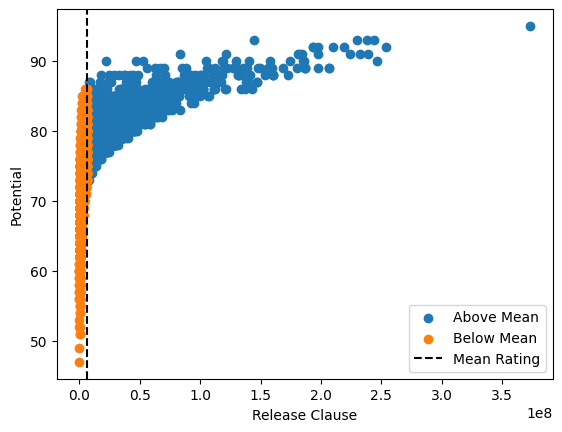

In [31]:
df_temp_3 = df[['Release Clause','Potential']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Potential'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Potential'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Potential')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

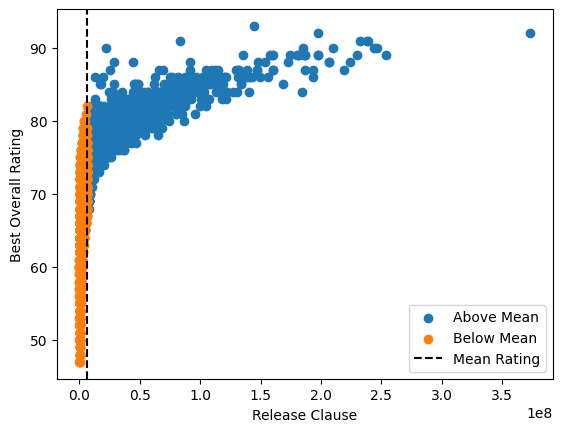

In [32]:
df_temp_3 = df[['Release Clause','Best Overall Rating']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Best Overall Rating'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Best Overall Rating'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Best Overall Rating')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

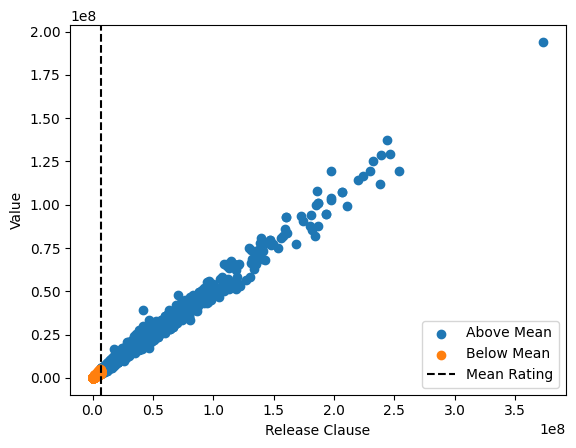

In [33]:
df_temp_3 = df[['Release Clause','Value']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Value'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Value'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Value')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

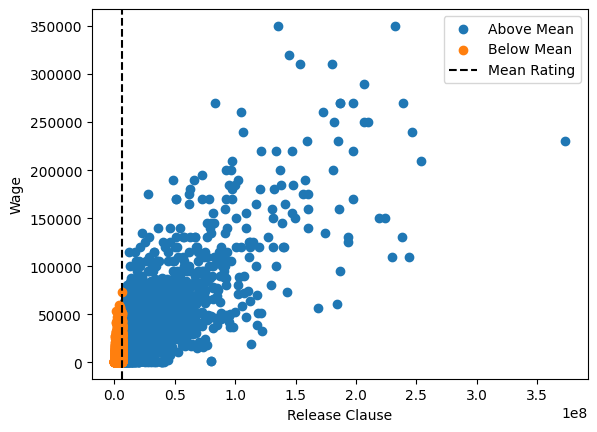

In [34]:
df_temp_3 = df[['Release Clause','Wage']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Wage'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Wage'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Wage')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

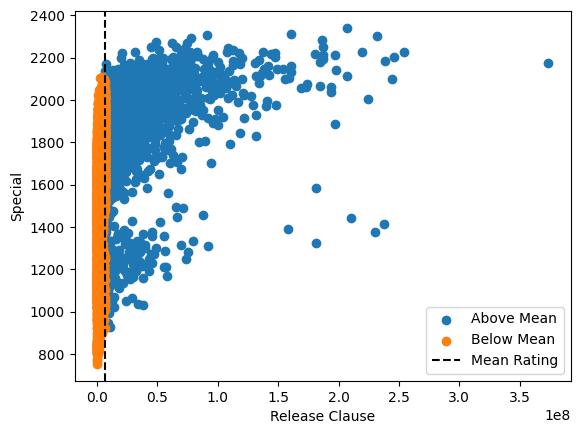

In [35]:
df_temp_3 = df[['Release Clause','Special']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Special'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Special'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Special')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

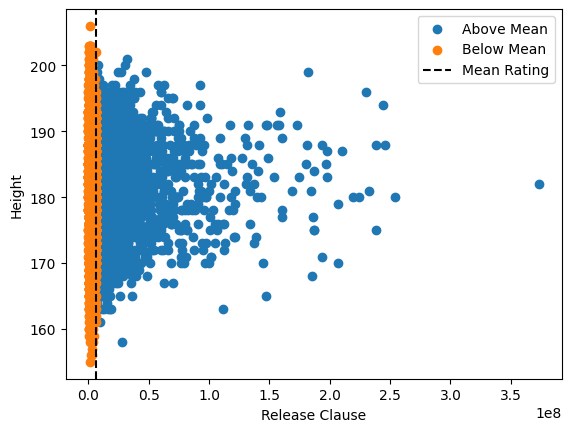

In [36]:
df_temp_3 = df[['Release Clause','Height']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Height'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Height'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Height')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

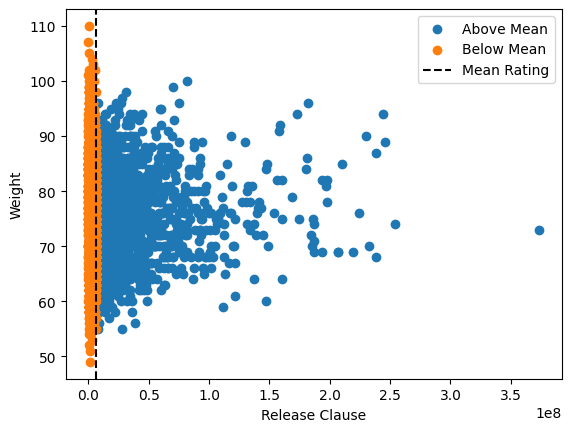

In [37]:
df_temp_3 = df[['Release Clause','Weight']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Weight'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Weight'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Weight')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

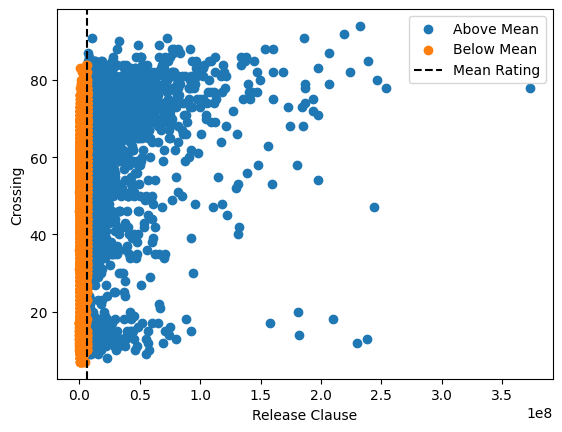

In [38]:
df_temp_3 = df[['Release Clause','Crossing']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Crossing'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Crossing'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Crossing')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

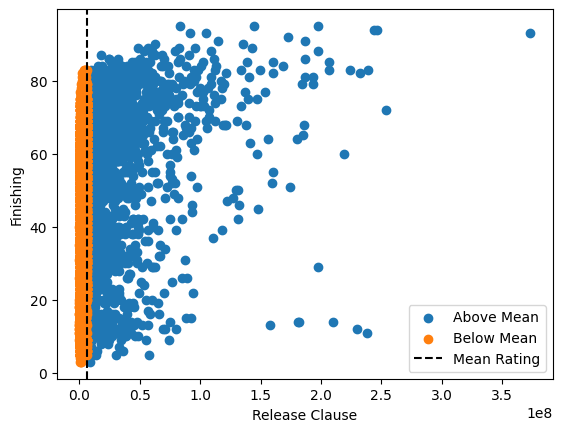

In [39]:
df_temp_3 = df[['Release Clause','Finishing']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Finishing'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Finishing'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Finishing')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

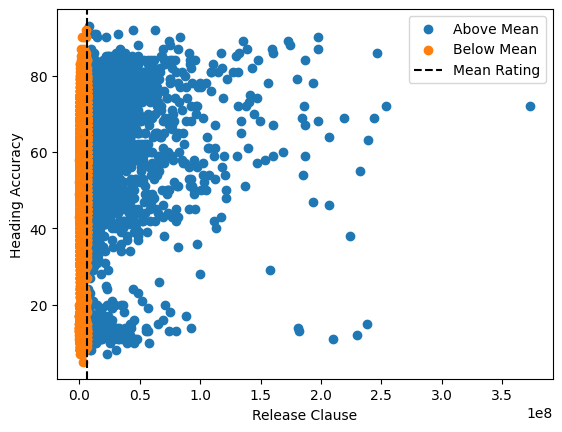

In [40]:
df_temp_3 = df[['Release Clause','Heading Accuracy']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Heading Accuracy'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Heading Accuracy'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Heading Accuracy')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

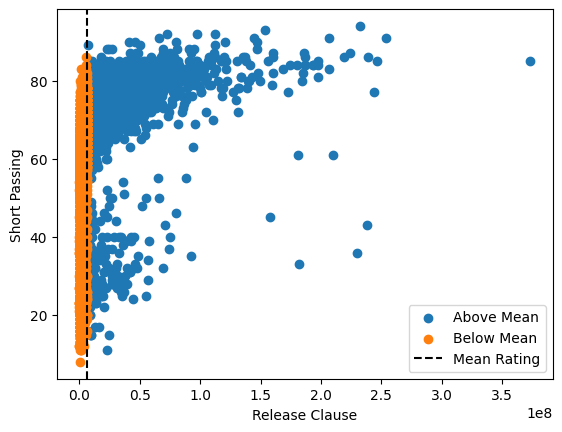

In [41]:
df_temp_3 = df[['Release Clause','Short Passing']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Short Passing'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Short Passing'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Short Passing')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

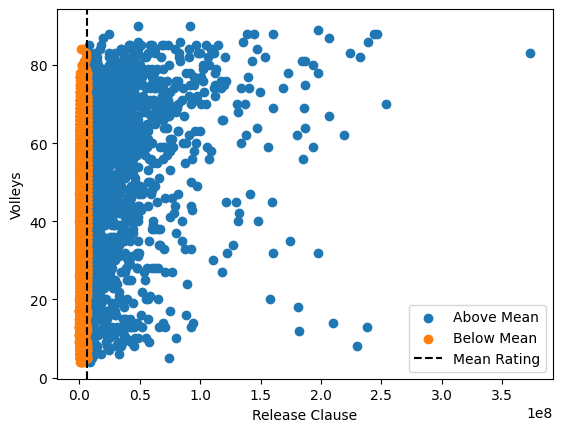

In [42]:
df_temp_3 = df[['Release Clause','Volleys']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Volleys'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Volleys'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Volleys')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

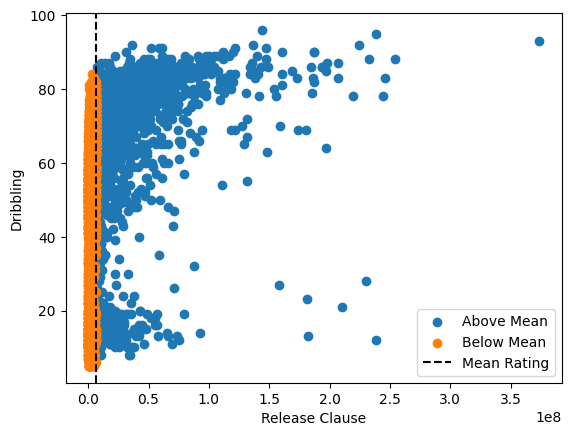

In [43]:
df_temp_3 = df[['Release Clause','Dribbling']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Dribbling'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Dribbling'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Dribbling')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

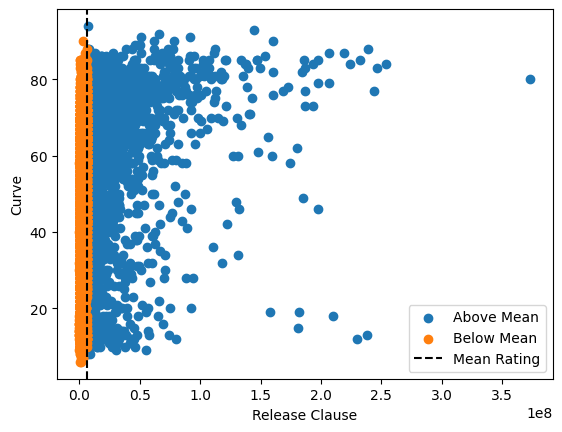

In [44]:
df_temp_3 = df[['Release Clause','Curve']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Curve'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Curve'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Curve')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

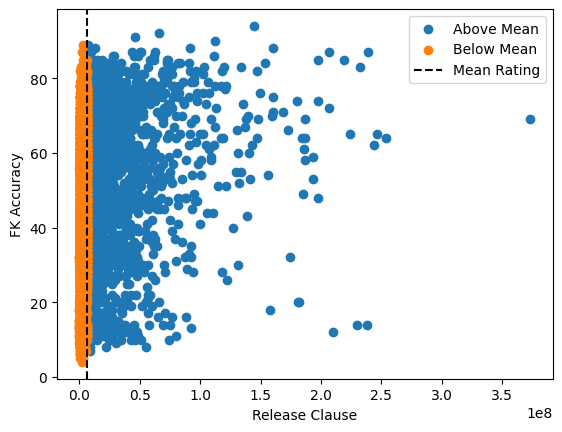

In [45]:
df_temp_3 = df[['Release Clause','FK Accuracy']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['FK Accuracy'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['FK Accuracy'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('FK Accuracy')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

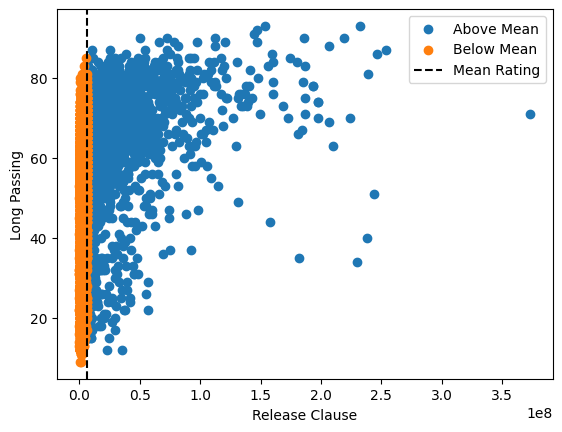

In [46]:
df_temp_3 = df[['Release Clause','Long Passing']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Long Passing'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Long Passing'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Long Passing')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

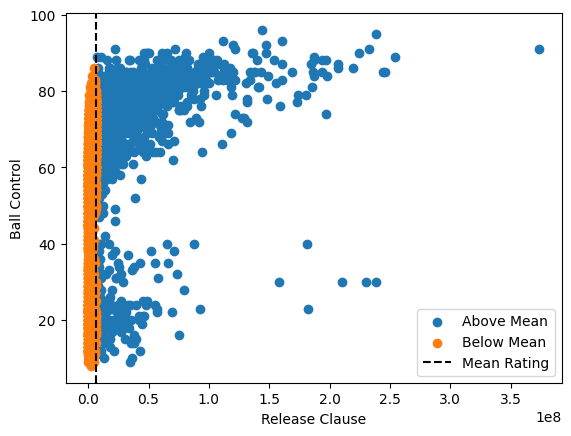

In [47]:
df_temp_3 = df[['Release Clause','Ball Control']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Ball Control'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Ball Control'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Ball Control')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

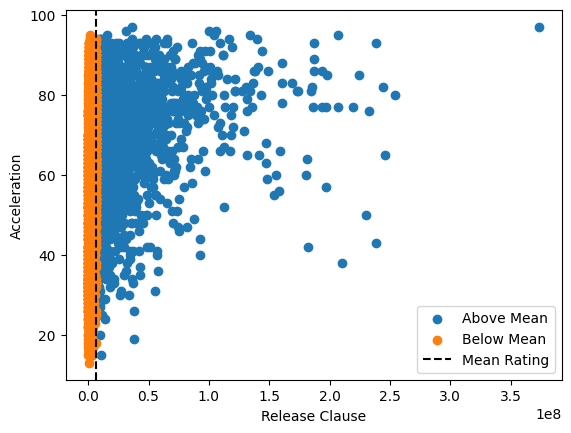

In [48]:
df_temp_3 = df[['Release Clause','Acceleration']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Acceleration'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Acceleration'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Acceleration')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

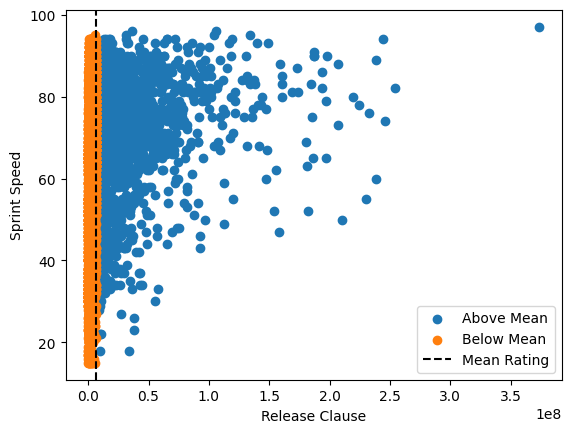

In [49]:
df_temp_3 = df[['Release Clause','Sprint Speed']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Sprint Speed'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Sprint Speed'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Sprint Speed')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

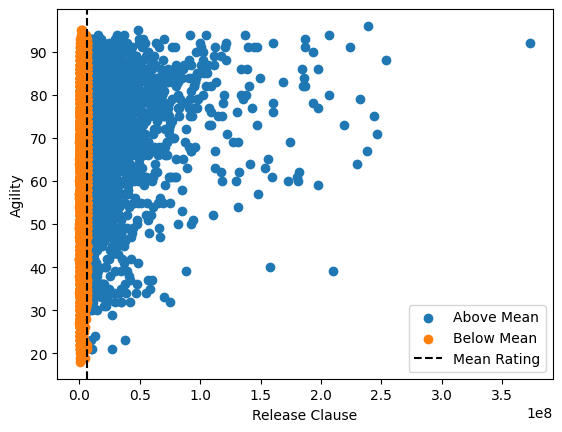

In [50]:
df_temp_3 = df[['Release Clause','Agility']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Agility'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Agility'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Agility')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

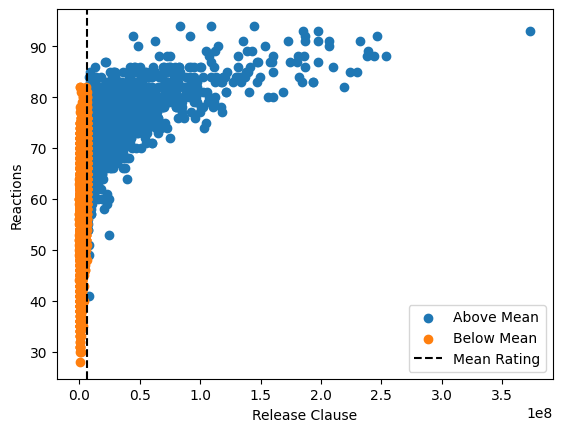

In [51]:
df_temp_3 = df[['Release Clause','Reactions']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Reactions'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Reactions'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Reactions')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

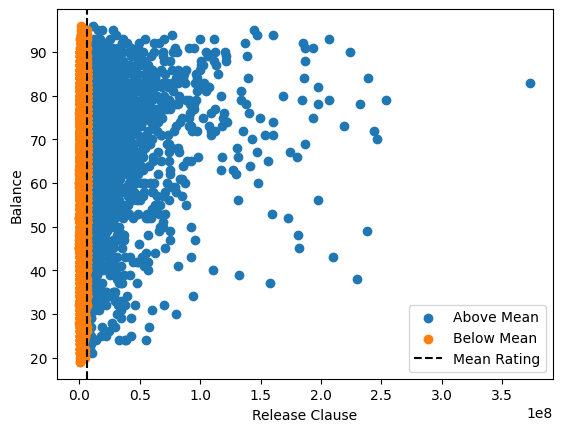

In [52]:
df_temp_3 = df[['Release Clause','Balance']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Balance'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Balance'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Balance')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

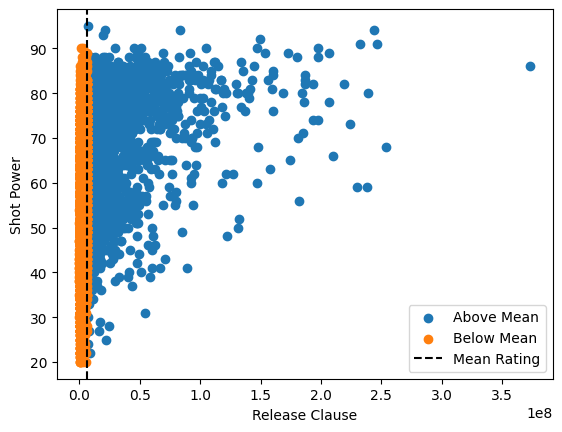

In [53]:
df_temp_3 = df[['Release Clause','Shot Power']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Shot Power'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Shot Power'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Shot Power')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

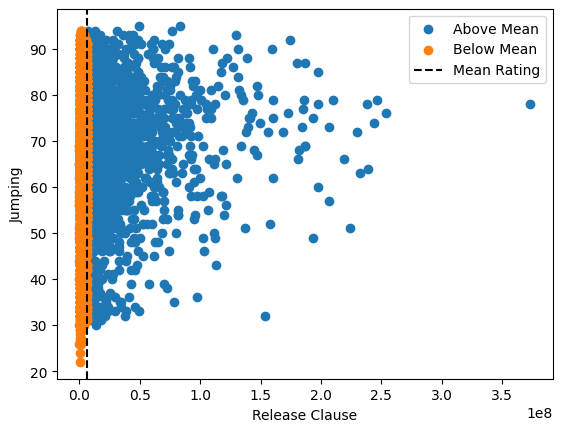

In [54]:
df_temp_3 = df[['Release Clause','Jumping']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Jumping'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Jumping'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Jumping')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

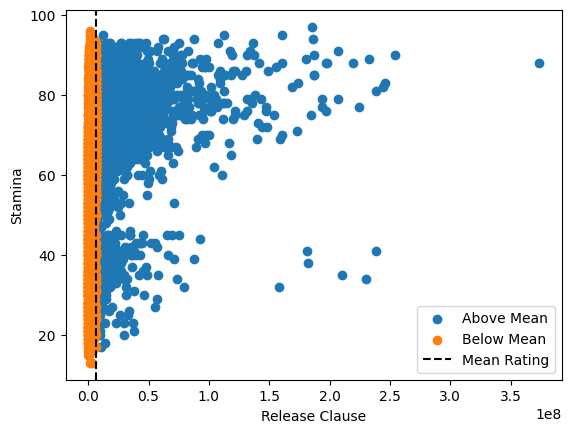

In [55]:
df_temp_3 = df[['Release Clause','Stamina']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Stamina'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Stamina'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Stamina')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

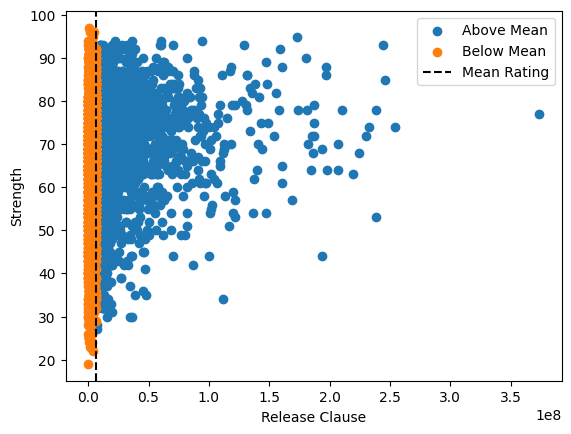

In [56]:
df_temp_3 = df[['Release Clause','Strength']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Strength'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Strength'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Strength')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

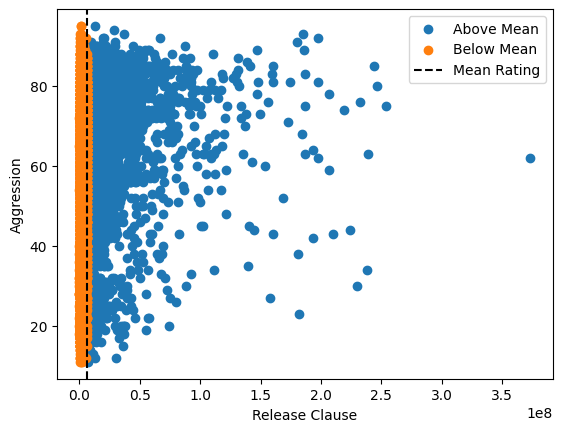

In [57]:
df_temp_3 = df[['Release Clause','Aggression']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Aggression'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Aggression'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Aggression')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

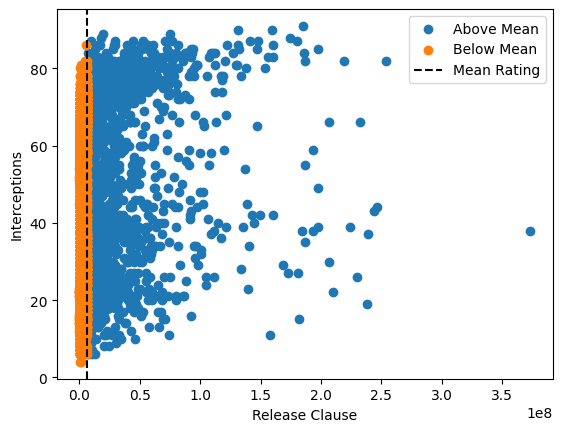

In [58]:
df_temp_3 = df[['Release Clause','Interceptions']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Interceptions'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Interceptions'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Interceptions')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

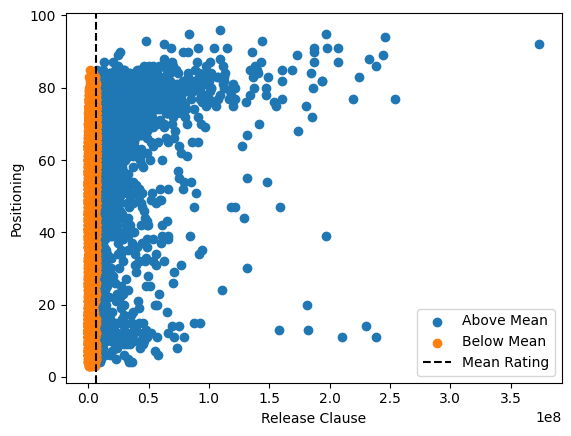

In [59]:
df_temp_3 = df[['Release Clause','Positioning']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Positioning'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Positioning'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Positioning')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

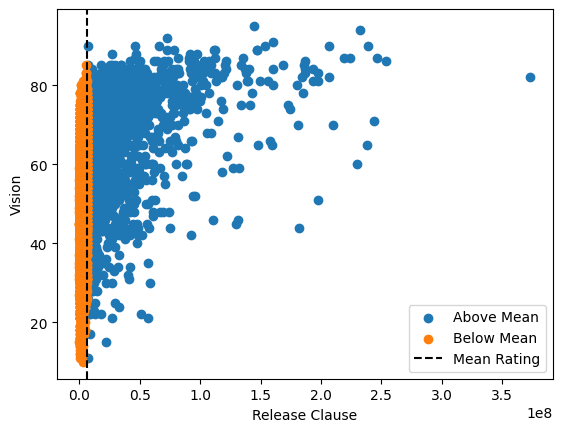

In [60]:
df_temp_3 = df[['Release Clause','Vision']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Vision'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Vision'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Vision')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

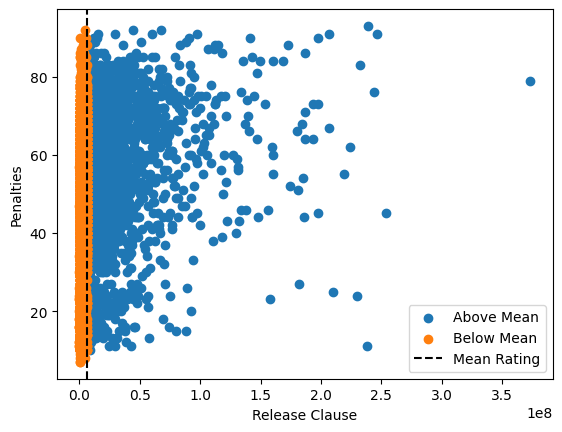

In [61]:
df_temp_3 = df[['Release Clause','Penalties']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Penalties'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Penalties'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Penalties')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

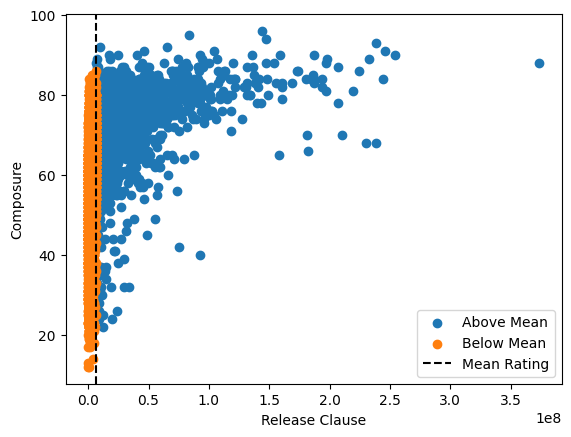

In [62]:
df_temp_3 = df[['Release Clause','Composure']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Composure'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Composure'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Composure')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

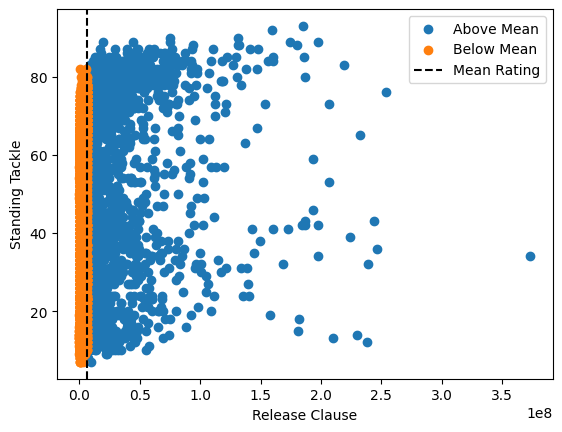

In [63]:
df_temp_3 = df[['Release Clause','Standing Tackle']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Standing Tackle'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Standing Tackle'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Standing Tackle')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

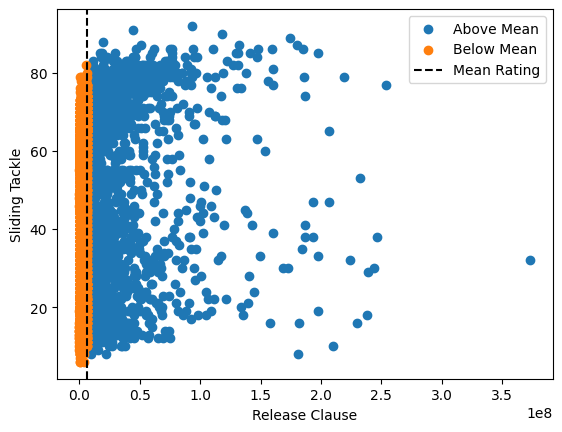

In [64]:
df_temp_3 = df[['Release Clause','Sliding Tackle']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Sliding Tackle'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Sliding Tackle'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Sliding Tackle')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

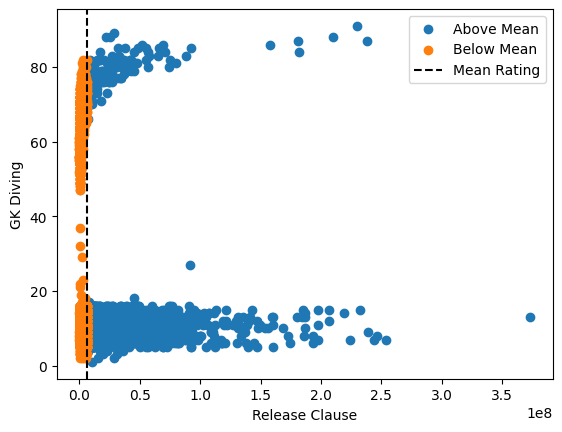

In [65]:
df_temp_3 = df[['Release Clause','GK Diving']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['GK Diving'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['GK Diving'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('GK Diving')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

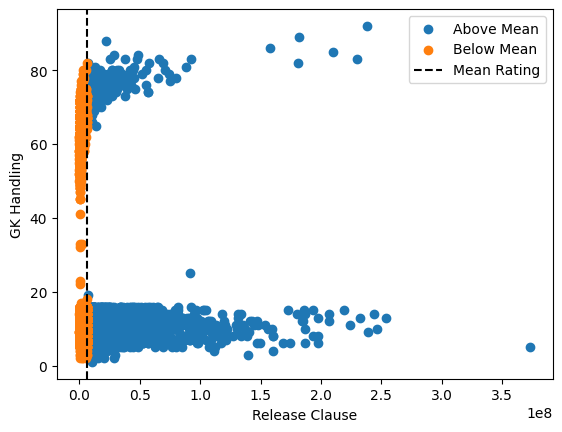

In [66]:
df_temp_3 = df[['Release Clause','GK Handling']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['GK Handling'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['GK Handling'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('GK Handling')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

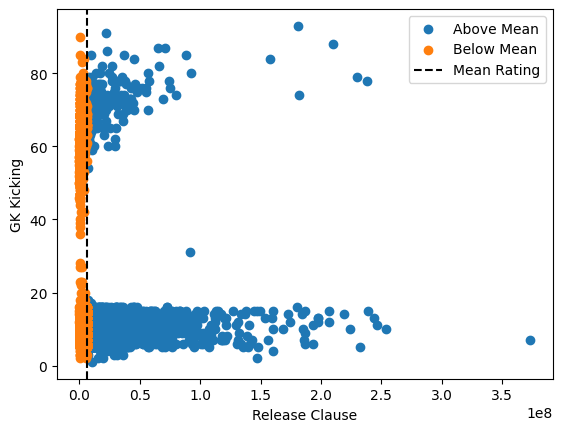

In [67]:
df_temp_3 = df[['Release Clause','GK Kicking']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['GK Kicking'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['GK Kicking'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('GK Kicking')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

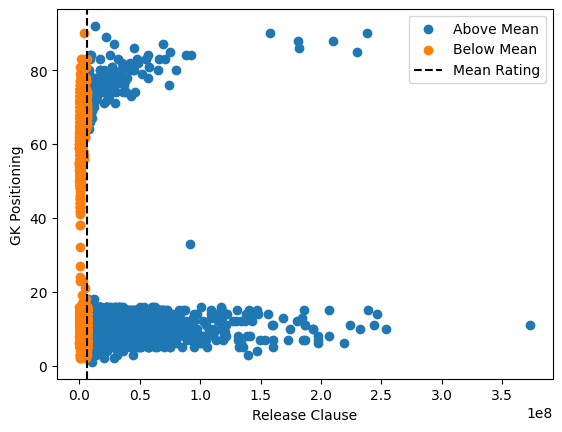

In [68]:
df_temp_3 = df[['Release Clause','GK Positioning']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['GK Positioning'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['GK Positioning'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('GK Positioning')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

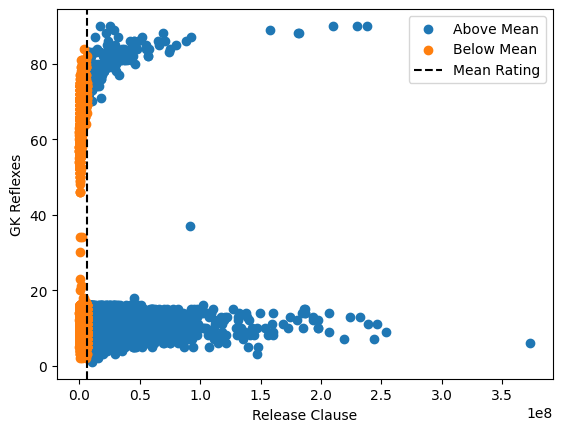

In [69]:
df_temp_3 = df[['Release Clause','GK Reflexes']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['GK Reflexes'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['GK Reflexes'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('GK Reflexes')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

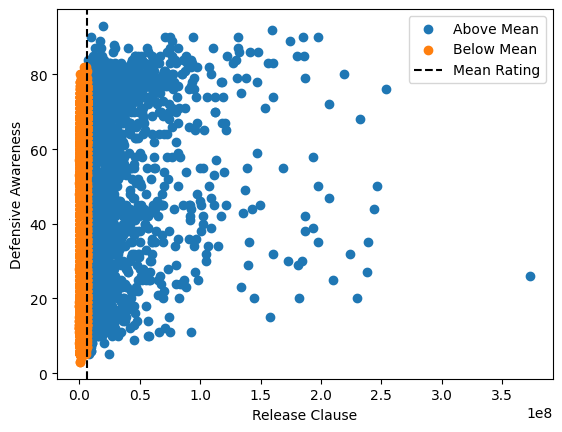

In [70]:
df_temp_3 = df[['Release Clause','Defensive Awareness']]

mean_rating = df_temp_3['Release Clause'].mean()

above_mean = df_temp_3[df_temp_3['Release Clause'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Release Clause'] < mean_rating]

plt.scatter(above_mean['Release Clause'], above_mean['Defensive Awareness'], label='Above Mean')
plt.scatter(below_mean['Release Clause'], below_mean['Defensive Awareness'], label='Below Mean')

plt.xlabel('Release Clause')
plt.ylabel('Defensive Awareness')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

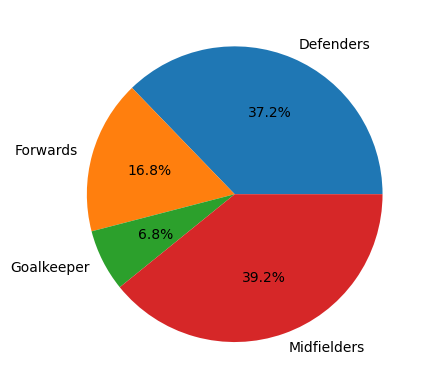

In [71]:
greseven = df.loc[df['Release Clause'] >= df['Release Clause'].mean()]
count_greseven_region = greseven.groupby(['Position']).count()

plt.pie(
    count_greseven_region['Release Clause'],
    labels=count_greseven_region.index,
    autopct='%1.1f%%'
)
plt.show()

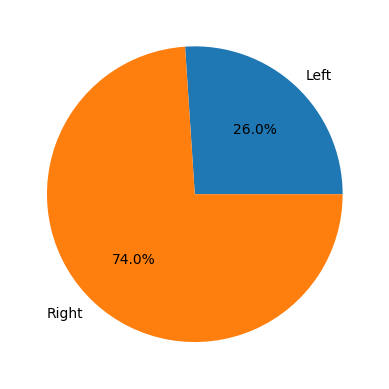

In [72]:
greseven = df.loc[df['Release Clause'] >= df['Release Clause'].mean()]
count_greseven_region = greseven.groupby(['Preferred Foot']).count()

plt.pie(
    count_greseven_region['Release Clause'],
    labels=count_greseven_region.index,
    autopct='%1.1f%%'
)
plt.show()

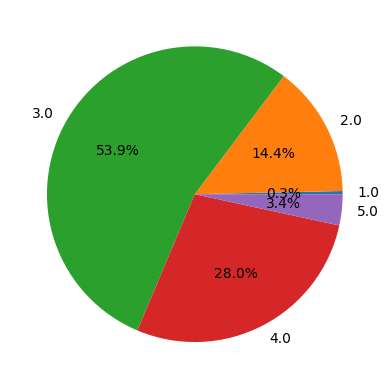

In [73]:
greseven = df.loc[df['Release Clause'] >= df['Release Clause'].mean()]
count_greseven_region = greseven.groupby(['Weak Foot']).count()

plt.pie(
    count_greseven_region['Release Clause'],
    labels=count_greseven_region.index,
    autopct='%1.1f%%'
)
plt.show()

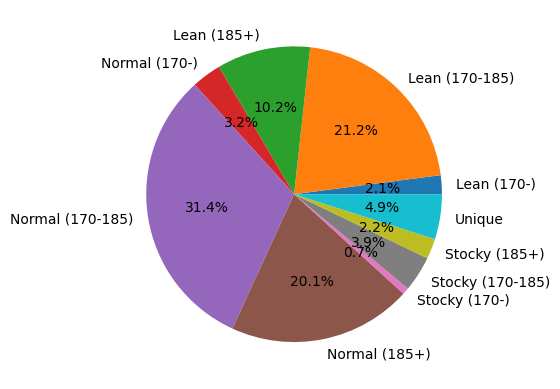

In [74]:
greseven = df.loc[df['Release Clause'] >= df['Release Clause'].mean()]
count_greseven_region = greseven.groupby(['Body Type']).count()

plt.pie(
    count_greseven_region['Release Clause'],
    labels=count_greseven_region.index,
    autopct='%1.1f%%'
)
plt.show()

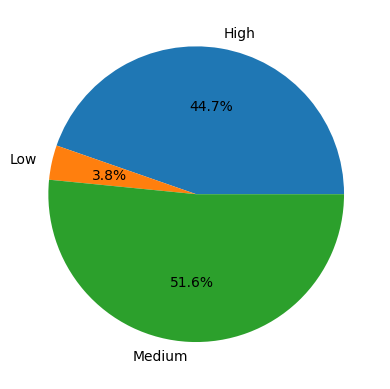

In [75]:
greseven = df.loc[df['Release Clause'] >= df['Release Clause'].mean()]
count_greseven_region = greseven.groupby(['Attacking Work Rate']).count()

plt.pie(
    count_greseven_region['Release Clause'],
    labels=count_greseven_region.index,
    autopct='%1.1f%%'
)
plt.show()

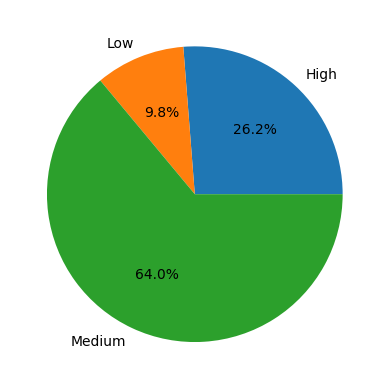

In [76]:
greseven = df.loc[df['Release Clause'] >= df['Release Clause'].mean()]
count_greseven_region = greseven.groupby(['Defensive Work Rate']).count()

plt.pie(
    count_greseven_region['Release Clause'],
    labels=count_greseven_region.index,
    autopct='%1.1f%%'
)
plt.show()

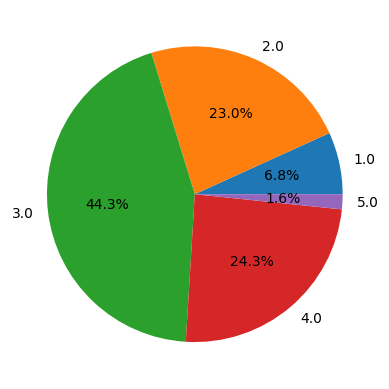

In [77]:
greseven = df.loc[df['Release Clause'] >= df['Release Clause'].mean()]
count_greseven_region = greseven.groupby(['Skill Moves']).count()

plt.pie(
    count_greseven_region['Release Clause'],
    labels=count_greseven_region.index,
    autopct='%1.1f%%'
)
plt.show()

Berdasarkan visualisasi di atas, ciri-ciri pemain sepakbola yang memiliki biaya transfer minimum yang diatas rata-rata antara lain
- mempunyai nilai overall yang tinggi
- mempunyai nilai potential yang tinggi
- mempunyai nilai best overall rating yang tinggi.
- mempunyai nilai value yang tinggi
- mempunyai nilai wage yang tinggi
- mempunyai nilai special yang tinggi
- mempunyai nilai height yang tinggi
- mempunyai nilai weight yang tinggi
- mempunyai nilai crossing yang tinggi
- mempunyai nilai finishing yang tinggi
- mempunyai nilai heading accuracy yang tinggi
- mempunyai nilai short passing yang tinggi.
- mempunyai nilai volleys yang tinggi
- mempunyai nilai dribbling yang tinggi
- mempunyai nilai curve yang tinggi
- mempunyai nilai fk accuracy yang tinggi
- mempunyai nilai long passing yang tinggi
- mempunyai nilai ball control yang tinggi
- mempunyai nilai acceleration yang tinggi
- mempunyai nilai sprint speed yang tinggi
- mempunyai nilai agility yang tinggi.
- mempunyai nilai reaction yang tinggi
- mempunyai nilai balance yang tinggi
- mempunyai nilai shot power yang tinggi
- mempunyai nilai jumping yang tinggi
- mempunyai nilai stamina yang tinggi
- mempunyai nilai strength yang tinggi
- mempunyai nilai aggresion yang tinggi
- mempunyai nilai interception yang tinggi
- mempunyai nilai positioning yang tinggi.
- mempunyai nilai vision yang tinggi
- mempunyai nilai penalties yang tinggi
- mempunyai nilai composure yang tinggi
- mempunyai nilai standing stackle yang tinggi
- mempunyai nilai sliding stackle yang tinggi
- mempunyai nilai Defensive Awareness yang tinggi
- mempunyai posisi midfielders
- mempunyai preffered foot right
- mempunyai weak foot 5.0
- mempunyai body type normal
- mempunyai Attacking Work Rate medium
- mempunyai Defensive Work Rate medium

 
 
 

 

## Pertanyaan 2
Apakah pemain dengan umur lebih dari 30 tahun masih bermain dengan kerja keras yang tinggi?

Berdasarkan deskripsi dataset yang disediakan di Scele, diketahui bahwa kerja keras pemain diwakilkan dengan dua fitur, yaitu attacking work rate  (tingkat kerja keras seorang pemain dalam menyerang) dan defensive work rate (tingkat kerja keras seorang pemain dalam bertahan).

Untuk menjawab pertanyaan ini, berikut langkah yang kami lakukan:
1. Membuat dataframe baru dengan memfilter row dengan pemain berusia lebih dari 30 tahun
2. Membuat pie chart untuk menunjukkan distribusi tingkat kerja keras pemain yang berusia di atas 30 tahun

 

In [78]:
df_age = df.copy()
mean_age = df_age['Age'].mean()
print("Rata-rata usia pemain secara keseluruhan: ", mean_age)

df_age30 = df_age[df_age['Age'] > 30]
jml = df_age30.shape[0]
print("Jumlah pemain berusia lebih dari 30 tahun: ", jml)

Rata-rata usia pemain secara keseluruhan:  25.577232949020697
Jumlah pemain berusia lebih dari 30 tahun:  2583


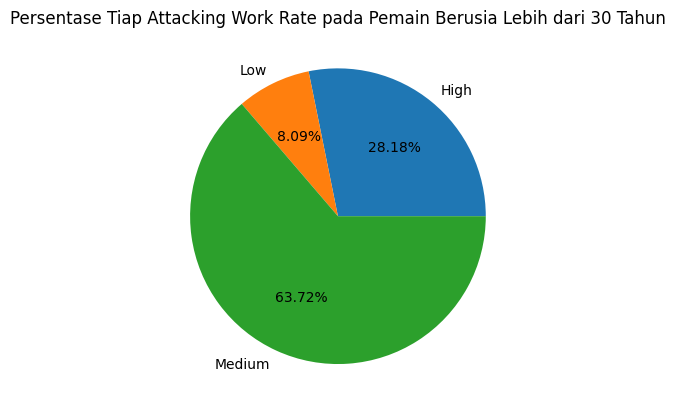

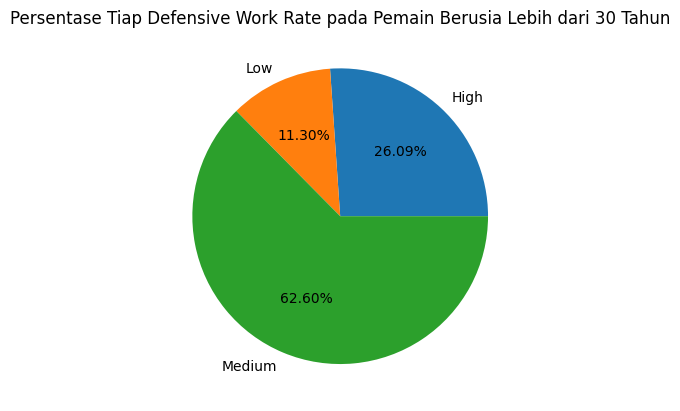

In [79]:
# pie chart untuk Attacking Work Rate
grouped_data = df_age30.groupby(['Attacking Work Rate']).count()
plt.pie(grouped_data['Age'], labels=grouped_data.index, autopct='%1.2f%%')
plt.title("Persentase Tiap Attacking Work Rate pada Pemain Berusia Lebih dari 30 Tahun")
plt.show()

# pie chart untuk Defensive Work Rate
grouped_data1 = df_age30.groupby(['Defensive Work Rate']).count()
plt.pie(grouped_data1['Age'], labels=grouped_data.index, autopct='%1.2f%%')
plt.title("Persentase Tiap Defensive Work Rate pada Pemain Berusia Lebih dari 30 Tahun")
plt.show()

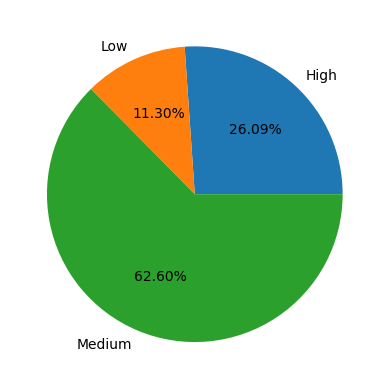

In [80]:
grouped_data = df_age30.groupby(['Defensive Work Rate']).count()
plt.pie(grouped_data['Age'], labels=grouped_data.index, autopct='%1.2f%%')
plt.show()

<AxesSubplot: xlabel='Attacking Work Rate', ylabel='Defensive Work Rate'>

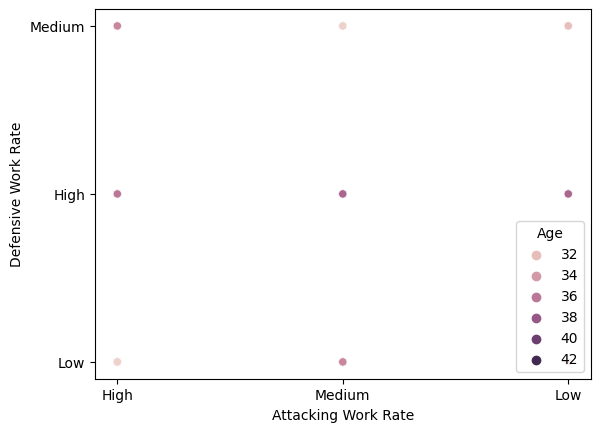

In [81]:
sns.scatterplot(data=df_age30, x='Attacking Work Rate', y='Defensive Work Rate', hue="Age")

Berdasarkan pie chart, dapat dilihat bahwa rata-rata pemain berusia lebih dari 30 tahun bermain dengan kerja keras yang sedang (medium) dengan persentase 63.72% untuk Attacking Work Rate dan 62.60% untuk Defensive Work Rate.


## Pertanyaan 3

Apakah terdapat hubungan antara posisi pemain sepakbola dengan tingkat skill-nya?

Untuk menjawab pertanyaan tersebut, kami melakukan visualisasi hubungan antara fitur 'Posisi' dengan setiap fitur yang kami asumsikan terkait dengan tingkat skill.

Kami menggunakan 2 bentuk visualisasi, yaitu
1. Scatter Plot untuk melihat pola hubungan antara fitur kategorikal dan numerikal
2. Bar Plot untuk melihat pola hubungan antara fitur kategorikal dan kategorikal 

In [82]:
df_temp_1 = df.groupby(['Position','Skill Moves']).size().reset_index(name='count')
df_temp_2 = df.groupby(['Position','Weak Foot']).size().reset_index(name='count')

<AxesSubplot: xlabel='Position', ylabel='count'>

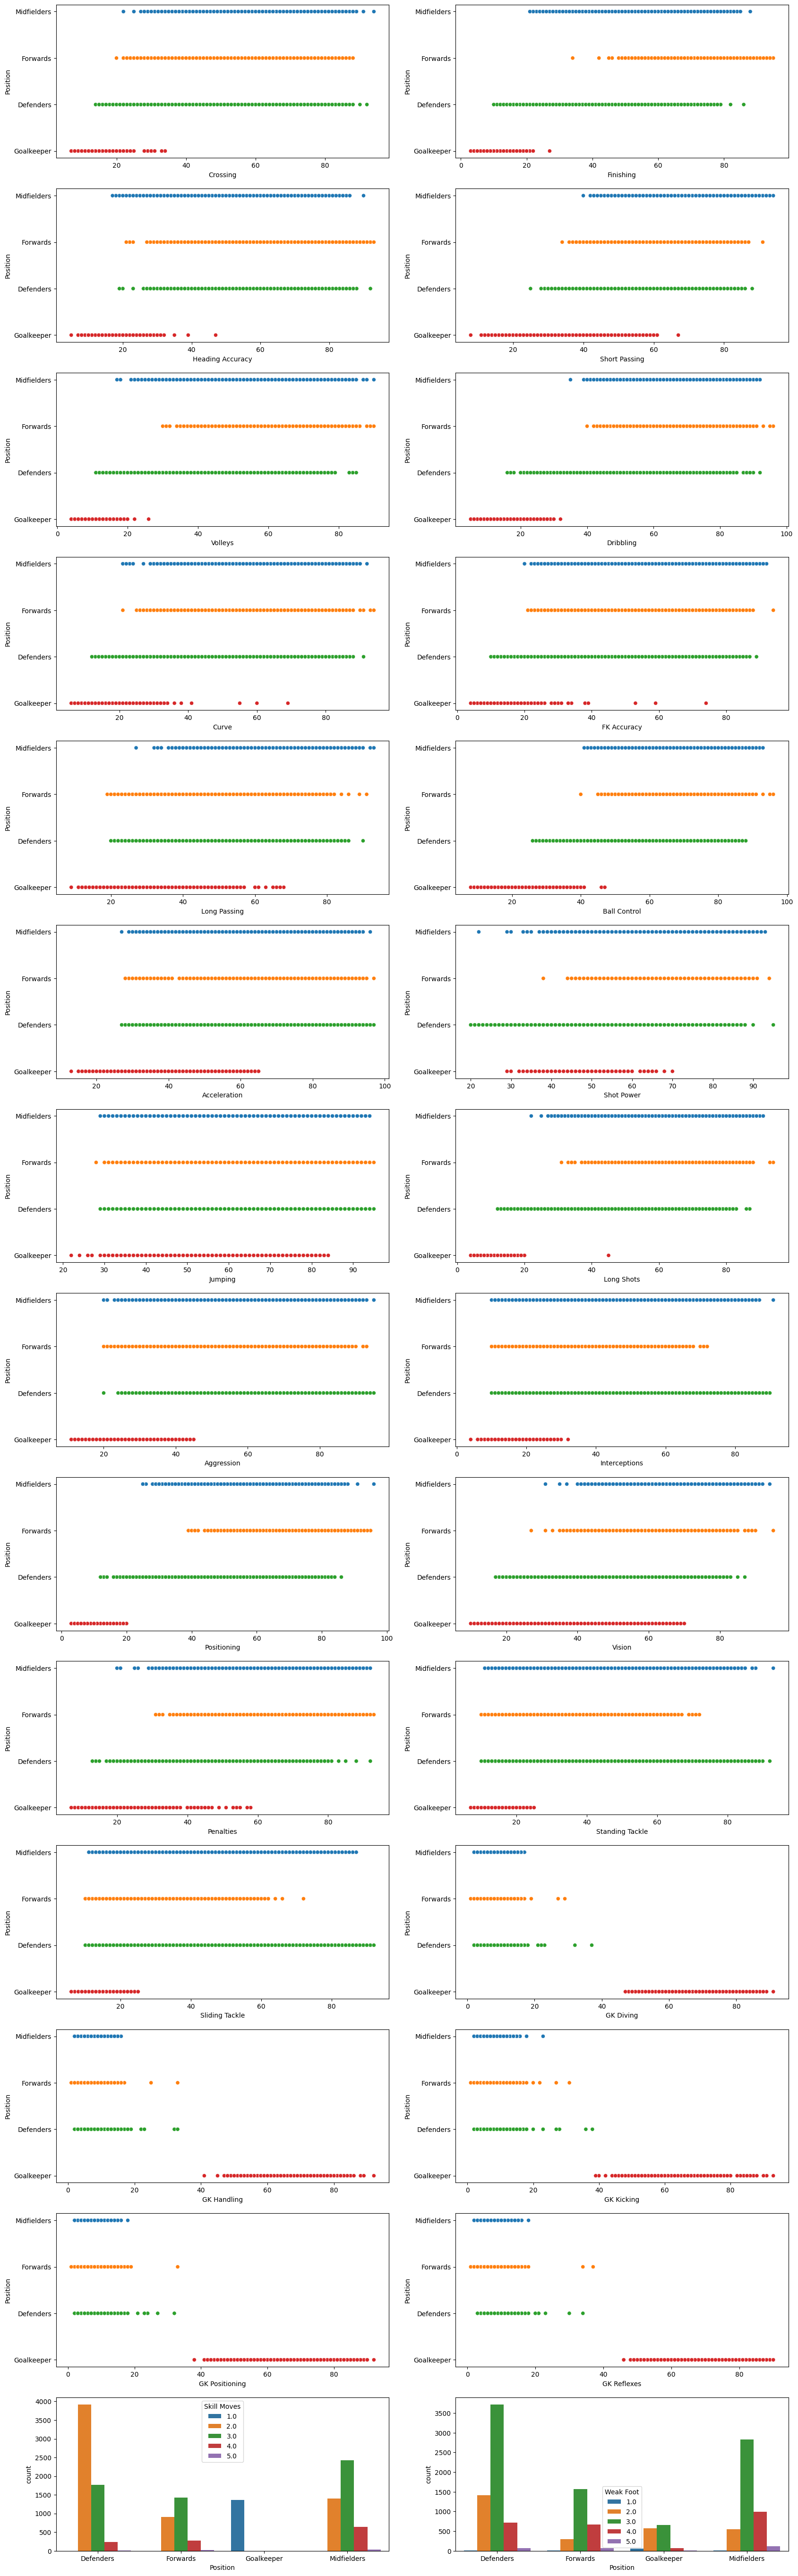

In [83]:
fig, axes = plt.subplots(14, 2, figsize=(20, 70))

sns.scatterplot(ax=axes[0, 0], data=df, x="Crossing", y="Position", hue="Position", legend=False)
sns.scatterplot(ax=axes[0, 1], data=df, x="Finishing", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[1, 0], data=df, x="Heading Accuracy", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[1, 1], data=df, x="Short Passing", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[2, 0], data=df, x="Volleys", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[2, 1], data=df, x="Dribbling", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[3, 0], data=df, x="Curve", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[3, 1], data=df, x="FK Accuracy", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[4, 0], data=df, x="Long Passing", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[4, 1], data=df, x="Ball Control", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[5, 0], data=df, x="Acceleration", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[5, 1], data=df, x="Shot Power", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[6, 0], data=df, x="Jumping", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[6, 1], data=df, x="Long Shots", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[7, 0], data=df, x="Aggression", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[7, 1], data=df, x="Interceptions", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[8, 0], data=df, x="Positioning", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[8, 1], data=df, x="Vision", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[9, 0], data=df, x="Penalties", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[9, 1], data=df, x="Standing Tackle", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[10, 0], data=df, x="Sliding Tackle", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[10, 1], data=df, x="GK Diving", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[11, 0], data=df, x="GK Handling", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[11, 1], data=df, x="GK Kicking", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[12, 0], data=df, x="GK Positioning", y="Position", hue="Position", legend=False) 
sns.scatterplot(ax=axes[12, 1], data=df, x="GK Reflexes", y="Position", hue="Position", legend=False) 
sns.barplot(ax=axes[13, 0], x="Position", y="count", hue="Skill Moves", data=df_temp_1)
sns.barplot(ax=axes[13, 1], x="Position", y="count", hue="Weak Foot", data=df_temp_2)

Dapat disimpulkan bahwa TERDAPAT HUBUNGAN antara POSISI pemain dengan TINGKAT SKILLnya
- Seorang Goalkeeper memiliki kemampuan terbaik pada skill yang berkaitan dengan seorang kiper, yaitu GK Driving, GK Handling, GK Kicking, GK Positioning, dan GK Reflex.
- Seorang Defenders memiliki kemampuan terbaik pada skill yang berkaitan dengan pertahanan bola dari lawan, yaitu Aggression, Standing Tackle, dan Sliding Tackle
- Seorang Forwards memiliki kemampuan terbaik pada skill yang berkaitan dengan penyerangan bola yaitu Curve, Ball Control, Long Shots, Positioning, dan Penalties.
- Seorang Midlefielders memiliki kemampuan terbaik pada skill yang berkaitan dengan menjaga kuasa bola dari lawan dan menyerahkan bola ke Forwards, yaitu Long Passing, Crossing, Short Passing, dan Vision. Selain itu, memiliki kemahiran paling baik dalam menggunakan weak foot dan mengolah bola dengan pergerakan skillnya.

## Pertanyaan 4

Apakah negara sepakbola dengan starting eleven terbaik?

Untuk menjawab pertanyaan tersebut, kami melakukan visualisasi perbandingan 5 negara dengan total Overall rating terbaik, kemudian melakukan visualisasi perbandingan 5 negara dengan total Value tertinggi. 

Kami menggunakan visualisasi, yaitu Bar plot untuk melihat perbandingannya.

Dalam pemilihan starting eleven, kami memastikan tepat 1 pemain sepak bola berposisi Goalkeeper.

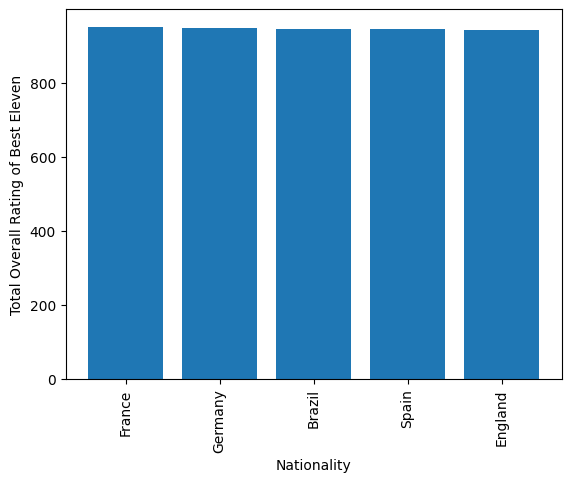

In [84]:
# Find 5 nationality/country who have the best starting eleven with exactly 1 goalkeeper 
# USING OVERALL
df4 = df.copy()

nationality_groups = df4.groupby('Nationality')

def get_best_starting_eleven(nationality_df):
    outfield_players = nationality_df[nationality_df['Position'] != 'Goalkeeper'].nlargest(10, 'Overall')
    goalkeeper = nationality_df[nationality_df['Position'] == 'Goalkeeper'].nlargest(1, 'Overall')

    return pd.concat([outfield_players[['Name', 'Position', 'Overall']], goalkeeper[['Name', 'Position', 'Overall']]])


best_starting_eleven_ratings = {}
for nationality, nationality_df in nationality_groups:
    best_starting_eleven = get_best_starting_eleven(nationality_df)
    total_overall_rating = best_starting_eleven['Overall'].sum()
    best_starting_eleven_ratings[nationality] = total_overall_rating


# Sorting
best_starting_eleven_ratings = pd.Series(best_starting_eleven_ratings).sort_values(ascending=False)

# Make bar chart
top_10_ratings = best_starting_eleven_ratings[:5]
plt.bar(top_10_ratings.index, top_10_ratings.values)
#plt.title('Top 5 Nationality by Overall Rating of Best Starting Eleven')
plt.xlabel('Nationality')
plt.ylabel('Total Overall Rating of Best Eleven')
plt.xticks(rotation=90)
plt.show()

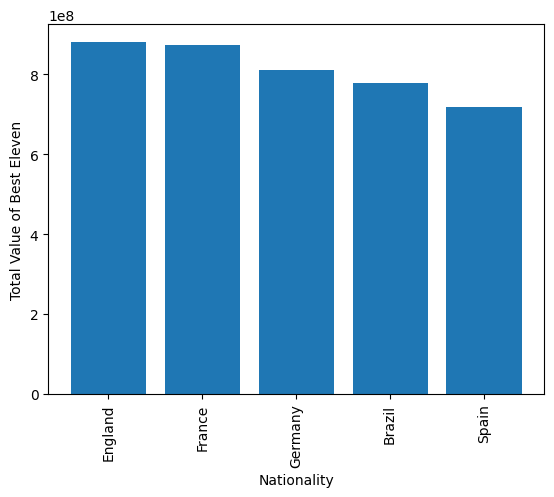

In [82]:
# Find 5 nationality/country who have the best starting eleven with exactly 1 goalkeeper 
# USING VALUE
df4 = df.copy()

nationality_groups = df4.groupby('Nationality')

def get_best_starting_eleven(nationality_df):
    outfield_players = nationality_df[nationality_df['Position'] != 'Goalkeeper'].nlargest(10, 'Value')
    goalkeeper = nationality_df[nationality_df['Position'] == 'Goalkeeper'].nlargest(1, 'Value')
    return pd.concat([outfield_players[['Name', 'Position', 'Value']], goalkeeper[['Name', 'Position', 'Value']]])


best_starting_eleven_ratings = {}
for nationality, nationality_df in nationality_groups:
    best_starting_eleven = get_best_starting_eleven(nationality_df)
    total_overall_rating = best_starting_eleven['Value'].sum()
    best_starting_eleven_ratings[nationality] = total_overall_rating


# Sorting
best_starting_eleven_ratings = pd.Series(best_starting_eleven_ratings).sort_values(ascending=False)

# Make bar chart
top_10_ratings = best_starting_eleven_ratings[:5]
plt.bar(top_10_ratings.index, top_10_ratings.values)
#plt.title('Top 5 Nationality by Total value of Best Starting Eleven')
plt.xlabel('Nationality')
plt.ylabel('Total Value of Best Eleven')
plt.xticks(rotation=90)
plt.show()

Dapat dilihat pada visualisasi bagian atas, France memiliki Total Overall Rating paling terbaik. Disusul oleh Germany, Brazil, Spain, England. Kemudian, dapat dilihat pada visualisasi bagian bawah, England memiliki Total Value paling tertinggi. Disusul oleh France, Germany, Brazil, Spain. Oleh karena itu, dapat disimpulkan bahwa negara sepakbola dengan starting eleven terbaik adalah France. 

## Pertanyaan 5

Apakah pemain dengan nilai rating yang diatas rata-rata memiliki nilai special yang tinggi? 

Untuk menjawab pertanyaan tersebut, kami melakukan visualisasi hubungan antara fitur 'Best Overall Rating' dengan fitur 'Special'

Kami menggunakan visualisasi, yaitu Scatter Plot untuk melihat antara keduanya.

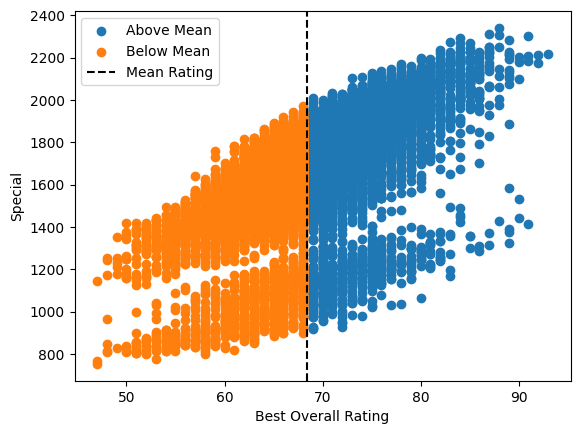

In [84]:
df_temp_3 = df[['Best Overall Rating','Special']]

mean_rating = df_temp_3['Best Overall Rating'].mean()

above_mean = df_temp_3[df_temp_3['Best Overall Rating'] >= mean_rating]
below_mean = df_temp_3[df_temp_3['Best Overall Rating'] < mean_rating]

plt.scatter(above_mean['Best Overall Rating'], above_mean['Special'], label='Above Mean')
plt.scatter(below_mean['Best Overall Rating'], below_mean['Special'], label='Below Mean')

plt.xlabel('Best Overall Rating')
plt.ylabel('Special')
plt.axvline(x=mean_rating, color='black', linestyle='--', label='Mean Rating')
plt.legend()

plt.show()

Dapat dlihat pada visualisasi disamping bahwa kedua variabel memiliki korelasi yang  cukup kuat dan positif, dimana apabila nilai Best Overall Rating tinggi, nilai Special juga akan tinggi. Nilai Special yang memiliki rating di atas rata-rata cenderung lebih tinggi dibandingkat yang di bawa rata-rata. Oleh karena itu, dapat disimpulkan bahwa pemain dengan nilai rating yang di atas rata rata cenderung memiliki nilai kespesialan yang tinggi.

## Pertanyaan 6

Apa negara yang memiliki pemain dengan best overall rating tertinggi?

Untuk menjawab pertanyaan tersebut, kami melakukan visualisasi perbandingan 10 negara dengan mean 'Best Overall Rating' terbaik

Kami menggunakan visualisasi, yaitu Horizontal Bar Plot untuk melihat perbandingannya.

C:\Users\FITRI\AppData\Local\Temp\ipykernel_18284\471653729.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nationality = df.groupby(['Nationality']).mean()


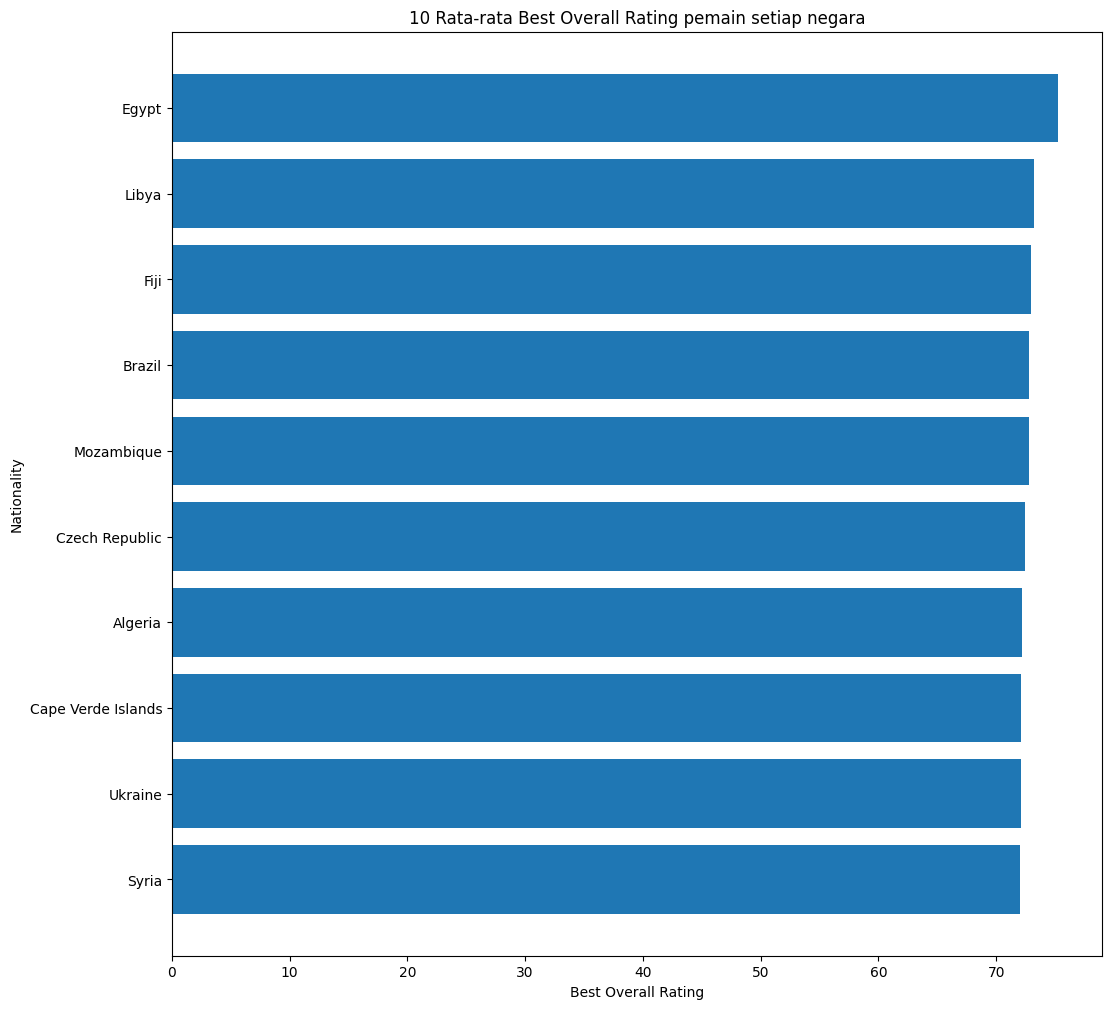

In [85]:
nationality = df.groupby(['Nationality']).mean()
rating = nationality['Best Overall Rating'].sort_values(ascending=True).tail(10)

plt.figure(figsize=(12,12))
plt.barh(rating.index, rating)
plt.xlabel('Best Overall Rating')
plt.ylabel('Nationality')
plt.title('10 Rata-rata Best Overall Rating pemain setiap negara')
plt.show()

Dapat dlihat pada visualisasi disamping bahwa Egypt memiliki rata-rata Best Overall Rating terbaik. Disusul oleh Libya, Fiji, Brazil, Mozambique, dan seterusnya


# Classification

## Modeling

In [169]:
X = df_cleaned.drop(["Position"], axis = 1)
y = df_cleaned["Position"]

### Scale the Data

In [170]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Split Data Test dan Train

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

### Assess The Best

In [89]:
def evaluate_classifier_performance(prediction, y_test):
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [90]:
classifiers = [
    ('RF', RandomForestClassifier()),
    ('GBM', GradientBoostingClassifier()),
    ('LR', LogisticRegression()),
    ('SGD', SGDClassifier()),
    ('KNN', KNeighborsClassifier(5)),
    ('SVC', SVC()),
    ('LiSVC', LinearSVC()),
    ('DT', DecisionTreeClassifier()),
    ('ET', ExtraTreeClassifier()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('XGB', XGBClassifier()),
    ('GNB', GaussianNB()),
    ]

result = pd.DataFrame(columns=['Classifier', 'Accuracy'])

skf = StratifiedKFold(n_splits=5)
for name, model in classifiers:
    cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    mean_acc = cv_scores.mean()

    result.loc[len(result)] = [name, mean_acc]

c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [91]:
result.sort_values('Accuracy', ascending=False).reset_index(drop=True)

Classifier  Accuracy
0         XGB  0.889390
1         SVC  0.884702
2         GBM  0.882271
3          LR  0.872981
4       LiSVC  0.872027
5          RF  0.872026
6         SGD  0.861782
7         LDA  0.857441
8         QDA  0.836951
9         KNN  0.803353
10         DT  0.803265
11        GNB  0.753950
12         ET  0.744227

## Features Reduction

### k-best

In [92]:
best_k = None
best_acc_k = 0
for k in range(1, X.shape[1] + 1):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    model = XGBClassifier()
    model_kbest = model.fit(X_train_selected, y_train)
    y1_pred_kbest = model_kbest.predict(X_test_selected)
    acc_kbest = accuracy_score(y_test, y1_pred_kbest)
    
    if acc_kbest > best_acc_k:
        best_acc_k = acc_kbest
        best_k = k
        
print("Best k value:", best_k)
print("Best accuracy:", best_acc_k)

Best k value: 53
Best accuracy: 0.9003472222222222


### Perbandingan

In [172]:
selector = SelectKBest(score_func=f_classif, k=53)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [94]:
classifiers = [
    ('XGB', XGBClassifier()),
    ]

result = pd.DataFrame(columns=['Classifier', 'Acc normal', 'Acc k-best'])

skf = StratifiedKFold(n_splits=5)
for name, model in classifiers:
    cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    mean_acc = cv_scores.mean()

    cv_scores_1 = cross_val_score(model, X_train_selected, y_train, cv=skf, scoring='accuracy')
    mean_acc_1 = cv_scores_1.mean()

    result.loc[len(result)] = [name, mean_acc, mean_acc_1]

In [95]:
result.sort_values('Classifier', ascending=False).reset_index(drop=True)

Classifier  Acc normal  Acc k-best
0        XGB     0.88939    0.893992

## Search The Best Parameter

In [96]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

param_grid = {
    'max_depth': range(3,10,2),
    'min_child_weight': range(1,6,2),
    'gamma': [0.1, 0.2, 0.3, 0.4],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300]
}

skf = StratifiedKFold(n_splits=5)
xgb = XGBClassifier()
xgb_random_search = RandomizedSearchCV(estimator = xgb, param_distributions = param_grid, n_iter = 50, cv = skf, verbose=2, random_state=42, n_jobs = -1)
xgb_random_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           impor...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': range(3, 10, 2),
                                        'min_child_weight': range(1, 6, 2),
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]},
                   random_state=42, verbose=2)

## Sampling

In [173]:
result = pd.DataFrame(columns=['sampler', 'accuracy'])

In [174]:
samplers = [
    ('RandomOverSampler', RandomOverSampler(sampling_strategy='minority')),
    ('SMOTE', SMOTE()),
    ('BorderlineSMOTE', BorderlineSMOTE()),
    ('SVMSMOTE', SVMSMOTE()),
    ('RandomUnderSampler', RandomUnderSampler(sampling_strategy='majority')),
    ('NearMiss1', NearMiss()),
    ('NearMiss2', NearMiss(version=2)),
    ('NearMiss3', NearMiss(version=3)),
    ('TomekLinks', TomekLinks())
    ]

best_model = XGBClassifier(**xgb_random_search.best_params_)

for name, sampler in samplers:
  X_train_sample, y_train_sample = sampler.fit_resample(X_train_selected, y_train)
  best_model = best_model.fit(X_train_sample, y_train_sample)
  y_pred = best_model.predict(X_test_selected)
  accuracy = accuracy_score(y_test, y_pred)
  
  result.loc[len(result)] = [name, accuracy]

c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


In [175]:
result.sort_values('accuracy', ascending=False).reset_index(drop=True)

sampler  accuracy
0     BorderlineSMOTE  0.896528
1          TomekLinks  0.896181
2   RandomOverSampler  0.895486
3            SVMSMOTE  0.893403
4               SMOTE  0.892708
5  RandomUnderSampler  0.864931
6           NearMiss2  0.767014
7           NearMiss1  0.744792
8           NearMiss3  0.640625

### Hasil Evaluasi Akhir

In [100]:
best_sampler = RandomOverSampler()
X_train_sample, y_train_sample = best_sampler.fit_resample(X_train_selected, y_train)

best_model = XGBClassifier(**xgb_random_search.best_params_)
best_model = best_model.fit(X_train_sample, y_train_sample)
y_pred = best_model.predict(X_test_selected)
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1171
           1       0.87      0.89      0.88       501
           2       1.00      1.00      1.00       258
           3       0.86      0.87      0.86       950

    accuracy                           0.89      2880
   macro avg       0.91      0.91      0.91      2880
weighted avg       0.90      0.89      0.89      2880



Confusion Matrix



prediction     0    1    2    3
actual                         
0           1043   28    0  100
1             15  446    0   40
2              0    0  258    0
3             82   38    0  830



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.8947916666666667
F1 Macro Average: 0.9119439241842916
F1 Micro Average: 0.8947916666666667
Precision Macro Average: 0.9104190334486345
Precision Micro Average: 0.8947916666666667
Recall Macro Average: 0.9136488719715498
Recall Micro Average: 0.8947916666666667



In [101]:
skf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(best_model, X_train_sample, y_train_sample, cv=skf, scoring='accuracy')
mean_acc = cv_scores.mean()
print(mean_acc)

0.9508112361693349


In [177]:
best_sampler = BorderlineSMOTE()
X_train_sample, y_train_sample = best_sampler.fit_resample(X_train_selected, y_train)

best_model = XGBClassifier(**xgb_random_search.best_params_)
best_model = best_model.fit(X_train_sample, y_train_sample)
y_pred = best_model.predict(X_test_selected)
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1171
           1       0.87      0.91      0.89       501
           2       1.00      1.00      1.00       258
           3       0.86      0.88      0.87       950

    accuracy                           0.90      2880
   macro avg       0.91      0.92      0.92      2880
weighted avg       0.90      0.90      0.90      2880



Confusion Matrix



prediction     0    1    2    3
actual                         
0           1038   29    0  104
1             16  455    0   30
2              0    0  258    0
3             69   42    0  839



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.8993055555555556
F1 Macro Average: 0.9159100846944719
F1 Micro Average: 0.8993055555555556
Precision Macro Average: 0.912902624733572
Precision Micro Average: 0.8993055555555556
Recall Macro Average: 0.9194408472820191
Recall Micro Average: 0.8993055555555556



In [178]:
skf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(best_model, X_train_sample, y_train_sample, cv=skf, scoring='accuracy')
mean_acc = cv_scores.mean()
print(mean_acc)

0.9238086637088896


In [179]:
best_sampler = TomekLinks()
X_train_sample, y_train_sample = best_sampler.fit_resample(X_train_selected, y_train)

best_model = XGBClassifier(**xgb_random_search.best_params_)
best_model = best_model.fit(X_train_sample, y_train_sample)
y_pred = best_model.predict(X_test_selected)
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1171
           1       0.88      0.88      0.88       501
           2       1.00      1.00      1.00       258
           3       0.87      0.87      0.87       950

    accuracy                           0.90      2880
   macro avg       0.91      0.91      0.91      2880
weighted avg       0.90      0.90      0.90      2880



Confusion Matrix



prediction     0    1    2    3
actual                         
0           1058   26    0   87
1             19  442    0   40
2              0    0  258    0
3             90   37    0  823



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.8961805555555555
F1 Macro Average: 0.9125226181070347
F1 Micro Average: 0.8961805555555555
Precision Macro Average: 0.9120403572626239
Precision Micro Average: 0.8961805555555555
Recall Macro Average: 0.9130131498430619
Recall Micro Average: 0.8961805555555555



In [180]:
skf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(best_model, X_train_sample, y_train_sample, cv=skf, scoring='accuracy')
mean_acc = cv_scores.mean()
print(mean_acc)

0.9089155173969828


# Regression

## Modeling

In [181]:
X = df_cleaned.drop(["Wage"], axis = 1)
y = df_cleaned["Wage"]

### Scale The Data

In [182]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Split Data Test dan Train

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

### Assess The Best

In [184]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet, HuberRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score

In [106]:
regression = [
    ('LR', LinearRegression()),
    ('R', Ridge(alpha=1.0)),
    ('L', Lasso(alpha=1.0)),
    ('EN', ElasticNet(alpha=1.0)),
    ('SGD', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeRegressor()),
    ('RF', RandomForestRegressor()),
    ('HR', HuberRegressor()),
    ('RANSAC', RANSACRegressor()),
    ('TS', TheilSenRegressor()),
]

result_reg = pd.DataFrame(columns=['Model', 'MSE', 'R2'])


for name, model in regression:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    result_reg.loc[len(result_reg)] = [name, mse, r2]

c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [107]:
result_reg.sort_values('R2', ascending=False).reset_index(drop=True)

Model           MSE        R2
0       RF  1.015503e+08  0.807551
1       LR  1.411366e+08  0.732530
2        L  1.411785e+08  0.732451
3        R  1.415297e+08  0.731785
4       TS  1.441896e+08  0.726744
5       HR  1.560167e+08  0.704331
6       DT  2.013140e+08  0.618487
7      SGD  3.671728e+08  0.304166
8      KNN  4.012461e+08  0.239593
9       EN  4.381977e+08  0.169566
10  RANSAC  5.017465e+08  0.049134

## Features Reduction

### K-Best

In [111]:
best_k = None
best_r2_k = 0
for k in range(1, X.shape[1] + 1):
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    model = RandomForestRegressor()
    model_kbest = model.fit(X_train_selected, y_train)
    y_pred_kbest = model_kbest.predict(X_test_selected)
    r2_kbest = r2_score(y_test, y_pred)

    if r2_kbest > best_r2_k:
        best_r2_k = r2_kbest
        best_k = k
        
print("Best k value:", best_k)
print("Best r2:", best_r2_k)

Best k value: 1
Best r2: 0.7267443489391943


### Perbandingan

In [112]:
selector = SelectKBest(score_func=f_regression, k=best_k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [114]:
classifiers = [
    ('RF', RandomForestRegressor()),
    ]

result = pd.DataFrame(columns=['Classifier', 'R2 normal', 'R2 k-best'])

skf = StratifiedKFold(n_splits=5)
for name, model in classifiers:
    cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='r2')
    mean_r2 = cv_scores.mean()

    cv_scores_1 = cross_val_score(model, X_train_selected, y_train, cv=skf, scoring='r2')
    mean_r2_1 = cv_scores_1.mean()

    result.loc[len(result)] = [name, mean_r2, mean_r2_1]

c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [117]:
result.sort_values('Classifier', ascending=False).reset_index(drop=True)

Classifier  R2 normal  R2 k-best
0         RF   0.782793   0.644355

## Search The Best Params

In [118]:
param_distribution = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()
skf = StratifiedKFold(n_splits=5)
random_search = RandomizedSearchCV(rf, param_distribution, cv=skf)
random_search.fit(X_train, y_train)

c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\FITRI\AppDa

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 5, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]})

## Sampling

In [185]:
result = pd.DataFrame(columns=['sampler', 'r2'])

In [186]:
samplers = [
    ('RandomOverSampler', RandomOverSampler(sampling_strategy='minority')),
    ('RandomUnderSampler', RandomUnderSampler(sampling_strategy='majority')),
    ]

for name, sampler in samplers:
  best_model = RandomForestRegressor(**random_search.best_params_)
  X_train_sample, y_train_sample = sampler.fit_resample(X_train, y_train)
  best_model = best_model.fit(X_train_sample, y_train_sample)
  y_pred = best_model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  
  result.loc[len(result)] = [name, r2]

c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [187]:
result.sort_values('r2', ascending=False).reset_index(drop=True)

sampler        r2
0  RandomUnderSampler  0.809080
1   RandomOverSampler  0.808291

# Clustering

In [257]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [258]:
df_cluster = df_cleaned[['Position', 'GK Diving', 'Aggression', 'Curve',
                         'Finishing', 'Short Passing', 'Dribbling', 
                         'Long Passing', 'Sprint Speed', 'Shot Power', 'Stamina', 
                         'Interceptions', 'GK Handling']]

In [259]:
# 3. Standarisasi atribut numerik yang dipilih
from sklearn.preprocessing import StandardScaler

numerical_attributes = ['GK Diving', 'Aggression', 'Curve', 'Long Passing', 'Finishing', 'Short Passing', 'Dribbling', 'Sprint Speed', 'Shot Power', 'Stamina', 'Interceptions', 'GK Handling']

df_std = pd.DataFrame(MinMaxScaler().fit_transform(df_cleaned[numerical_attributes]), columns=numerical_attributes)
df_std['Position'] = df_cleaned['Position']  # Membiarkan dulu atribut kategorikal
df_std.head()

GK Diving  Aggression     Curve  Long Passing  Finishing  Short Passing  \
0   0.122222    0.797619  0.920455      0.940476   0.869565       0.965116   
1   0.133333    0.833333  0.795455      0.892857   0.858696       0.906977   
2   0.288889    0.904762  0.909091      0.809524   0.978261       0.872093   
3   0.155556    0.773810  0.897727      1.000000   0.858696       1.000000   
4   0.077778    0.869048  0.931818      0.821429   0.684783       0.860465   

   Dribbling  Sprint Speed  Shot Power   Stamina  Interceptions  GK Handling  \
0   0.857143      0.707317    0.920000  0.928571       0.712644     0.142857   
1   0.868132      0.829268    0.866667  0.892857       0.942529     0.076923   
2   0.857143      0.658537    0.920000  0.773810       0.425287     0.263736   
3   0.912088      0.743902    0.946667  0.904762       0.712644     0.131868   
4   0.901099      0.743902    0.826667  0.916667       0.862069     0.142857   

   Position  
0       3.0  
1       3.0  
2       1.0  
3       3.0  
4       0.0

In [260]:
# 4. Encoding atribut kategorikal
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_std['Position'] = le.fit_transform(df_std['Position'])
df_std.head()

GK Diving  Aggression     Curve  Long Passing  Finishing  Short Passing  \
0   0.122222    0.797619  0.920455      0.940476   0.869565       0.965116   
1   0.133333    0.833333  0.795455      0.892857   0.858696       0.906977   
2   0.288889    0.904762  0.909091      0.809524   0.978261       0.872093   
3   0.155556    0.773810  0.897727      1.000000   0.858696       1.000000   
4   0.077778    0.869048  0.931818      0.821429   0.684783       0.860465   

   Dribbling  Sprint Speed  Shot Power   Stamina  Interceptions  GK Handling  \
0   0.857143      0.707317    0.920000  0.928571       0.712644     0.142857   
1   0.868132      0.829268    0.866667  0.892857       0.942529     0.076923   
2   0.857143      0.658537    0.920000  0.773810       0.425287     0.263736   
3   0.912088      0.743902    0.946667  0.904762       0.712644     0.131868   
4   0.901099      0.743902    0.826667  0.916667       0.862069     0.142857   

   Position  
0         3  
1         3  
2         1  
3         3  
4         0

In [261]:
def compute_silhouette_coef(df: pd.DataFrame, k_lower: int, k_upper: int):
    print("Komparasi silhouette coefficient untuk k berbeda:")
    print("=================================================")
    for k in [*range(k_lower, k_upper+1)]:
        # Mendefinisikan model K-Means dengan nilai k tertentu
        clusterer = KMeans(n_clusters = k)

        # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
        cluster_labels = clusterer.fit_predict(df)
        silhouette_avg = silhouette_score(df, cluster_labels)
        print(
            f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}"
        )

In [262]:
compute_silhouette_coef(df_std, 2, 6)

Komparasi silhouette coefficient untuk k berbeda:


c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.6622052763131298


c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.5748590384194737


c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.5230429496603839


c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.4482360855812633


c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Untuk k = 6, rata-rata silhouette_coefficient adalah: 0.46783853363932476


c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_coefficient is : 0.6622052763131298


c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_coefficient is : 0.4736346341606096


c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_coefficient is : 0.5230429496603839


c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_coefficient is : 0.4482360855812633


c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_coefficient is : 0.46783853363932476


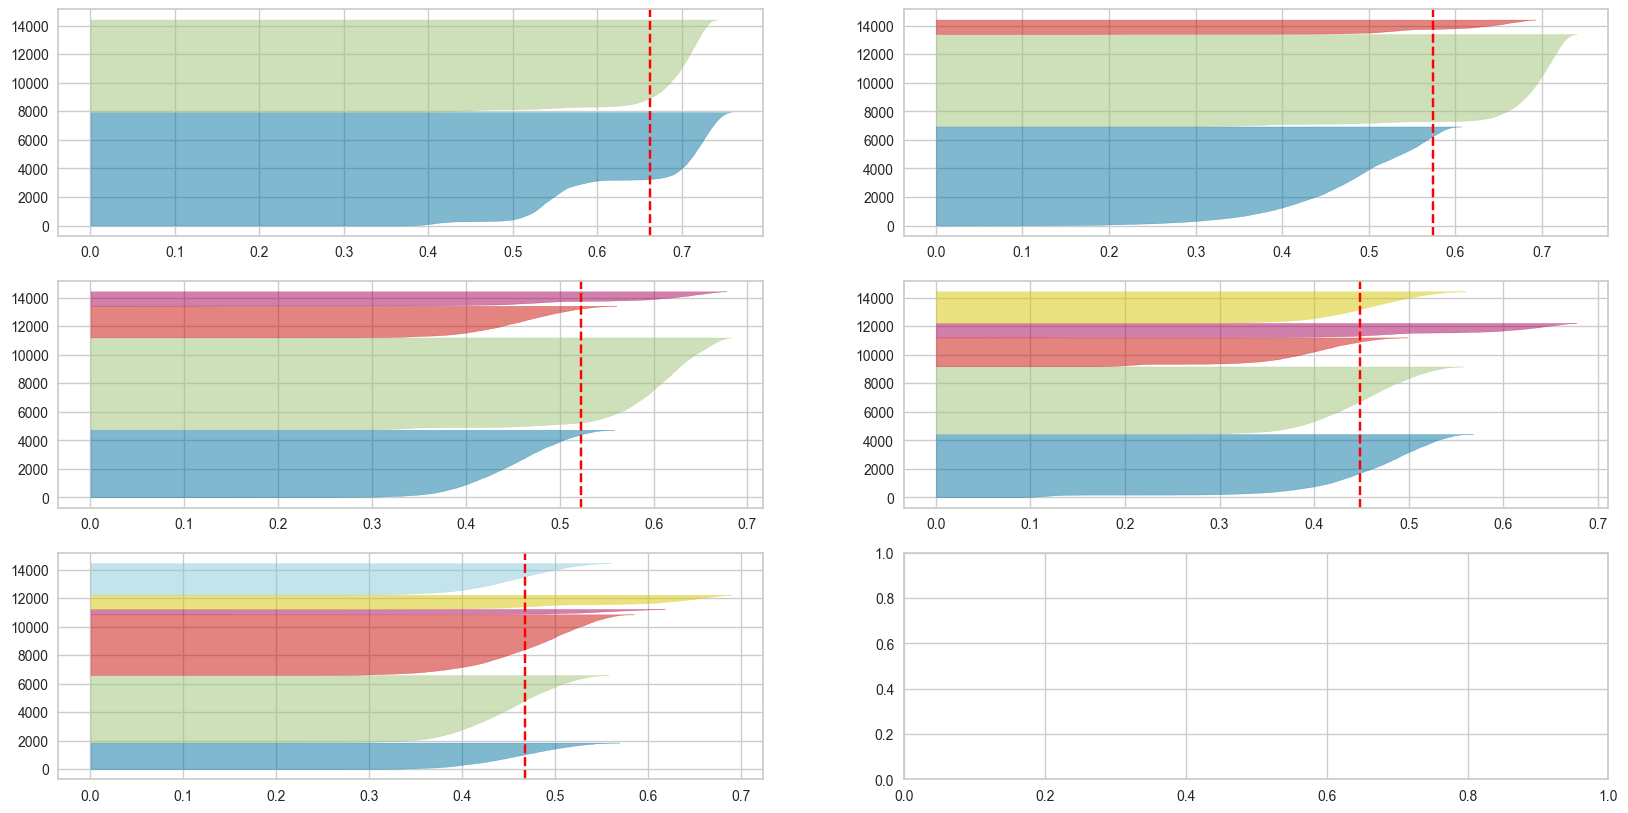

In [263]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(20,10))
for k in [2, 3, 4, 5, 6]:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k)

    # Draw silhouette diagram
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(df_std)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(df_std)
    silhouette_avg = silhouette_score(df_std, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0, 0.5, 'wcss')

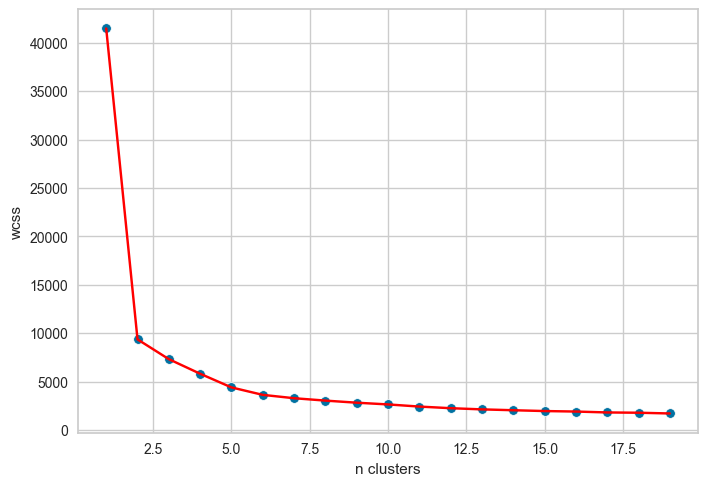

In [264]:
wcss=[]

n_cluster=range(1,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i)
    kmean.fit(df_std)
    wcss.append(kmean.inertia_) 
    y_pred=kmean.predict(df_std)

sns.scatterplot(x=n_cluster,y=wcss)
plt.plot(n_cluster,wcss,c="red")
plt.xlabel("n clusters")
plt.ylabel("wcss")

In [265]:
cluster = KMeans(n_clusters=2)
df_std["Cluster"] = cluster.fit_predict(df_std)
df_std["Cluster"] = df_std["Cluster"].astype("category")

df_std.head(20)

c:\Users\FITRI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


GK Diving  Aggression     Curve  Long Passing  Finishing  Short Passing  \
0    0.122222    0.797619  0.920455      0.940476   0.869565       0.965116   
1    0.133333    0.833333  0.795455      0.892857   0.858696       0.906977   
2    0.288889    0.904762  0.909091      0.809524   0.978261       0.872093   
3    0.155556    0.773810  0.897727      1.000000   0.858696       1.000000   
4    0.077778    0.869048  0.931818      0.821429   0.684783       0.860465   
5    0.077778    0.928571  0.897727      0.964286   0.706522       0.918605   
6    0.166667    0.833333  0.681818      0.797619   0.869565       0.860465   
7    0.166667    0.761905  0.818182      0.857143   0.782609       0.918605   
8    0.144444    0.916667  0.806818      0.880952   0.793478       0.872093   
9    0.133333    0.607143  0.897727      0.952381   0.750000       0.965116   
10   0.133333    0.857143  0.761364      0.880952   0.847826       0.906977   
11   0.111111    0.940476  0.772727      0.880952   0.673913       0.860465   
12   0.044444    0.750000  0.806818      0.845238   0.619565       0.895349   
13   0.088889    0.833333  0.840909      0.869048   0.826087       0.883721   
14   0.111111    0.809524  0.784091      0.833333   0.717391       0.906977   
15   0.133333    0.773810  0.920455      0.857143   0.652174       0.860465   
16   0.066667    0.761905  0.886364      0.928571   0.750000       0.965116   
17   0.111111    0.785714  0.795455      0.857143   0.847826       0.883721   
18   0.044444    0.797619  0.840909      0.714286   0.728261       0.848837   
19   0.144444    0.809524  0.897727      0.892857   0.750000       0.906977   

    Dribbling  Sprint Speed  Shot Power   Stamina  Interceptions  GK Handling  \
0    0.857143      0.707317    0.920000  0.928571       0.712644     0.142857   
1    0.868132      0.829268    0.866667  0.892857       0.942529     0.076923   
2    0.857143      0.658537    0.920000  0.773810       0.425287     0.263736   
3    0.912088      0.743902    0.946667  0.904762       0.712644     0.131868   
4    0.901099      0.743902    0.826667  0.916667       0.862069     0.142857   
5    0.857143      0.609756    0.773333  0.964286       0.919540     0.153846   
6    0.846154      0.682927    0.840000  0.928571       0.873563     0.164835   
7    0.879121      0.743902    0.773333  0.952381       0.873563     0.054945   
8    0.846154      0.878049    0.866667  0.892857       0.919540     0.076923   
9    0.879121      0.670732    0.786667  0.833333       0.873563     0.087912   
10   0.846154      0.914634    0.853333  0.916667       0.896552     0.054945   
11   0.659341      0.658537    0.786667  0.773810       0.954023     0.076923   
12   0.791209      0.756098    0.826667  0.738095       0.931034     0.065934   
13   0.857143      0.731707    0.853333  0.845238       0.919540     0.120879   
14   0.857143      0.743902    0.653333  0.976190       0.919540     0.043956   
15   0.791209      0.841463    0.893333  0.857143       0.862069     0.076923   
16   0.912088      0.817073    0.640000  0.916667       0.896552     0.131868   
17   0.813187      0.804878    0.906667  0.857143       0.712644     0.131868   
18   0.934066      0.902439    0.853333  0.773810       0.793103     0.043956   
19   0.824176      0.658537    0.840000  0.952381       0.908046     0.120879   

    Position Cluster  
0          3       0  
1          3       0  
2          1       1  
3          3       0  
4          0       1  
5          3       0  
6          3       0  
7          3       0  
8          3       0  
9          4       0  
10         3       0  
11         3       0  
12         0       1  
13         0       1  
14         3       0  
15         3       0  
16         0       1  
17         3       0  
18         3       0  
19         0       1

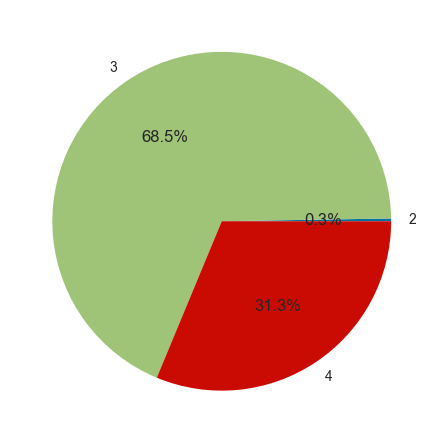

In [266]:
greseven = df_std.loc[df_std['Cluster']==0]
count_greseven_region = greseven.groupby(['Position']).count()

plt.pie(
    count_greseven_region['Cluster'],
    labels=count_greseven_region.index,
    autopct='%1.1f%%'
)
plt.show()

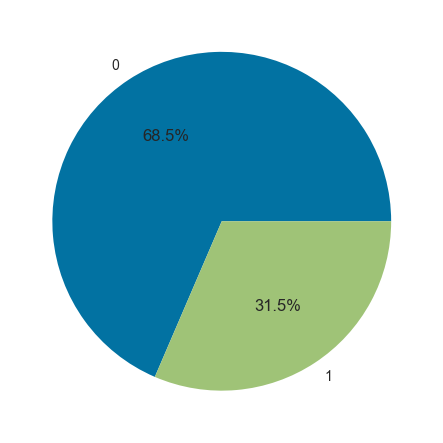

In [271]:
greseven = df_std.loc[df_std['Cluster']==1]
count_greseven_region = greseven.groupby(['Position']).count()

plt.pie(
    count_greseven_region['Cluster'],
    labels=count_greseven_region.index,
    autopct='%1.1f%%'
)
plt.show()

In [267]:
df_std_num = df_std.select_dtypes(include=['int', 'float'])
print(df_std_num.columns)

Index(['GK Diving', 'Aggression', 'Curve', 'Long Passing', 'Finishing',
       'Short Passing', 'Dribbling', 'Sprint Speed', 'Shot Power', 'Stamina',
       'Interceptions', 'GK Handling', 'Position'],
      dtype='object')


In [268]:
grouped_df = df_std.groupby('Cluster').mean()
grouped_df

GK Diving  Aggression     Curve  Long Passing  Finishing  \
Cluster                                                             
0         0.140730    0.587147  0.546123      0.586149   0.529803   
1         0.183546    0.532280  0.467818      0.523431   0.463789   

         Short Passing  Dribbling  Sprint Speed  Shot Power   Stamina  \
Cluster                                                                 
0             0.650137   0.624887       0.64089    0.568465  0.646404   
1             0.591694   0.555356       0.60284    0.514841  0.584981   

         Interceptions  GK Handling  Position  
Cluster                                        
0             0.536681     0.138502  3.310009  
1             0.482513     0.178283  0.314614

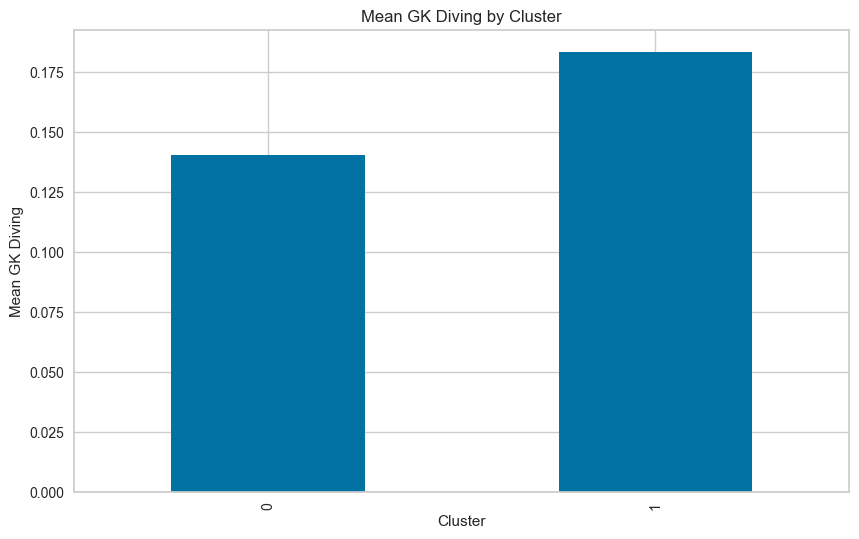

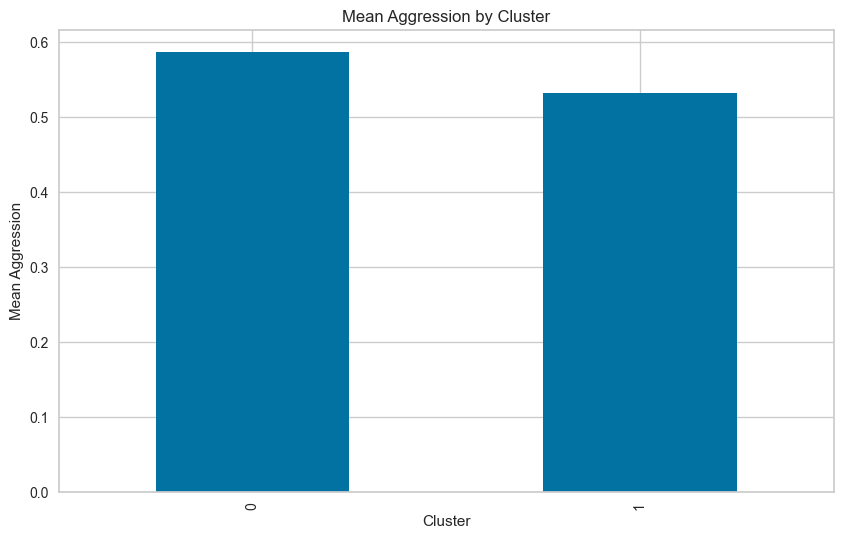

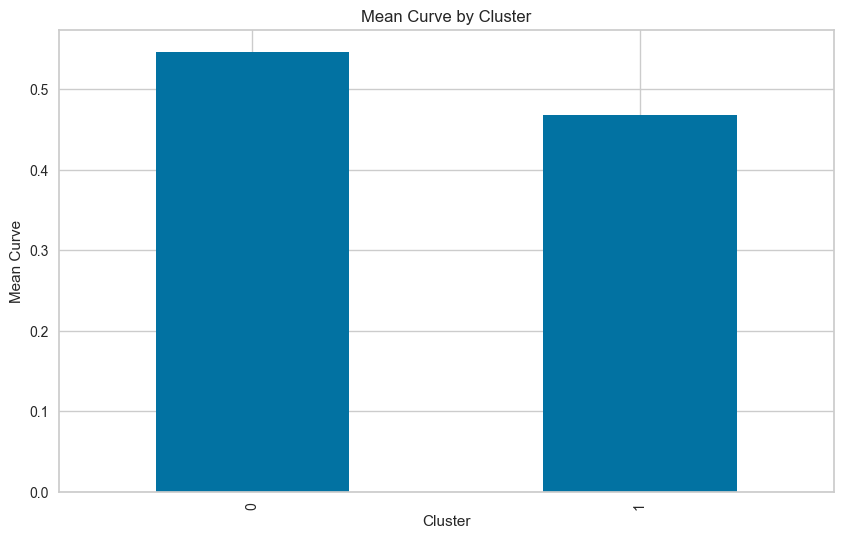

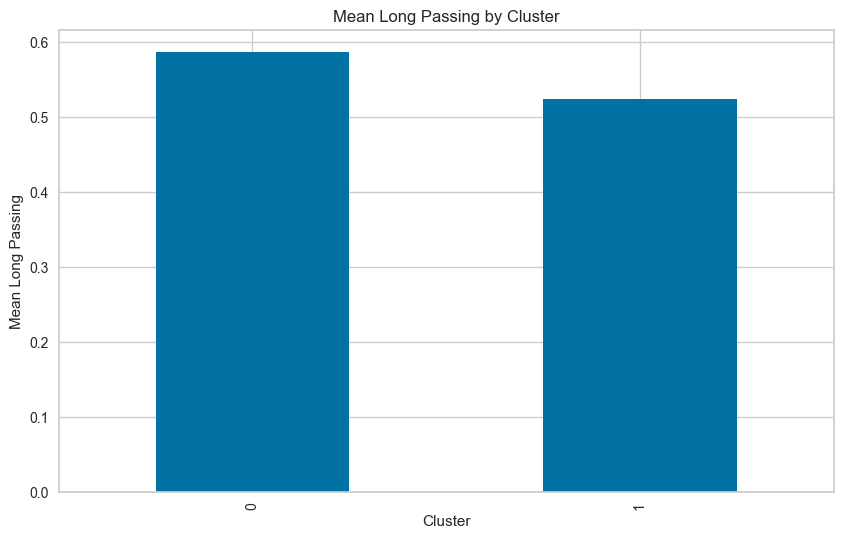

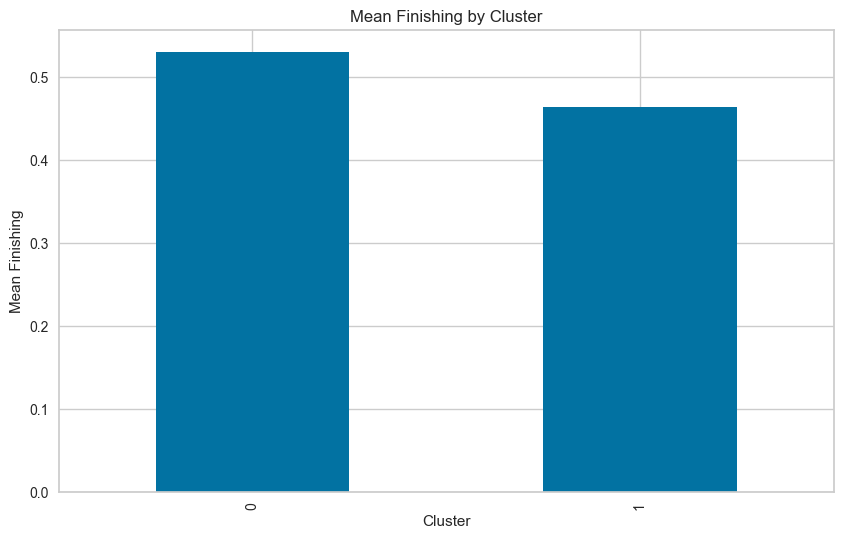

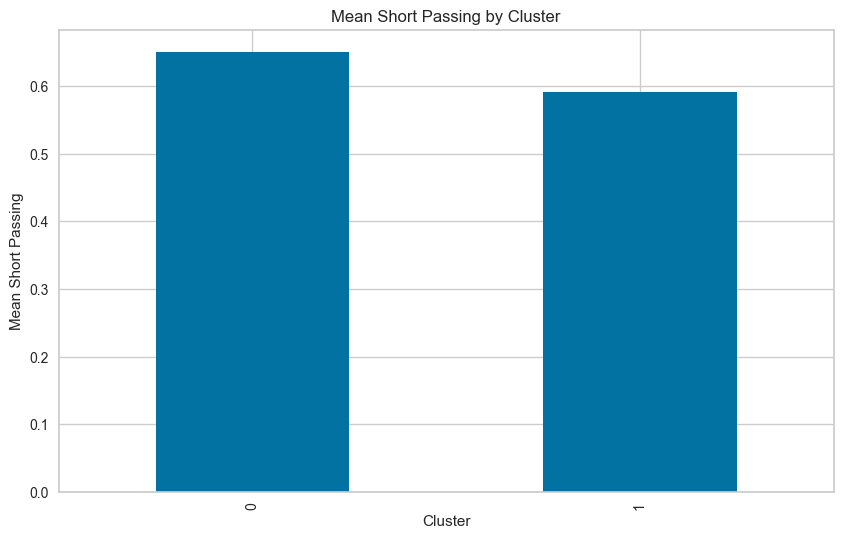

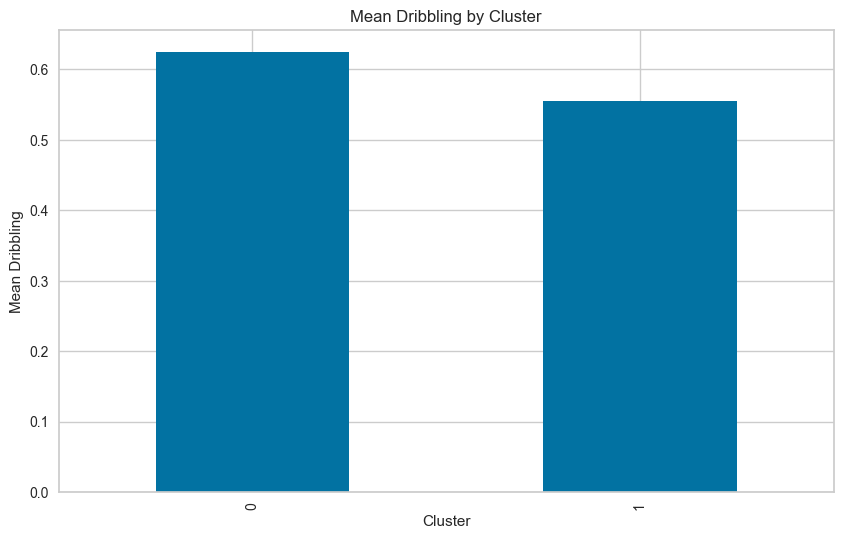

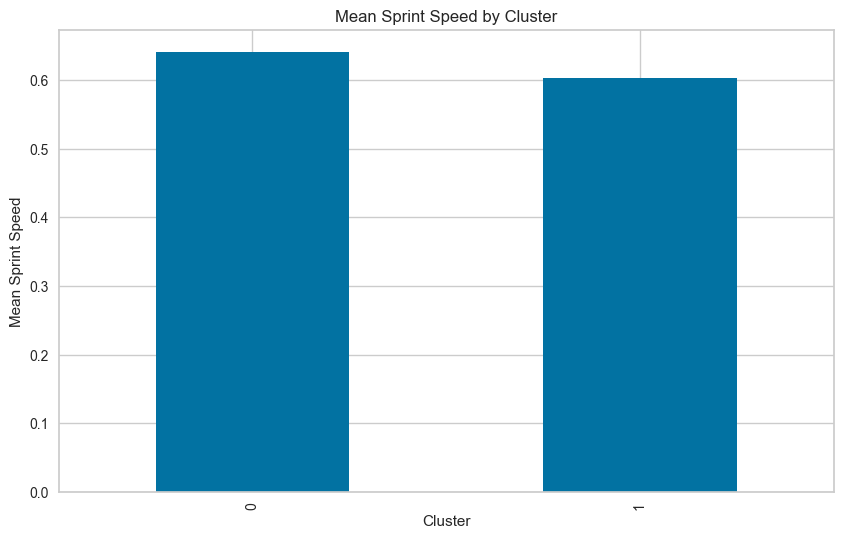

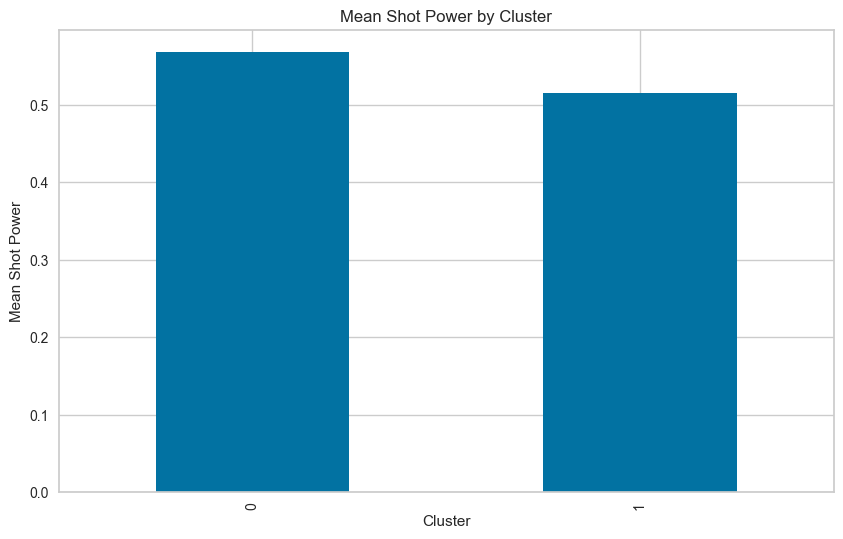

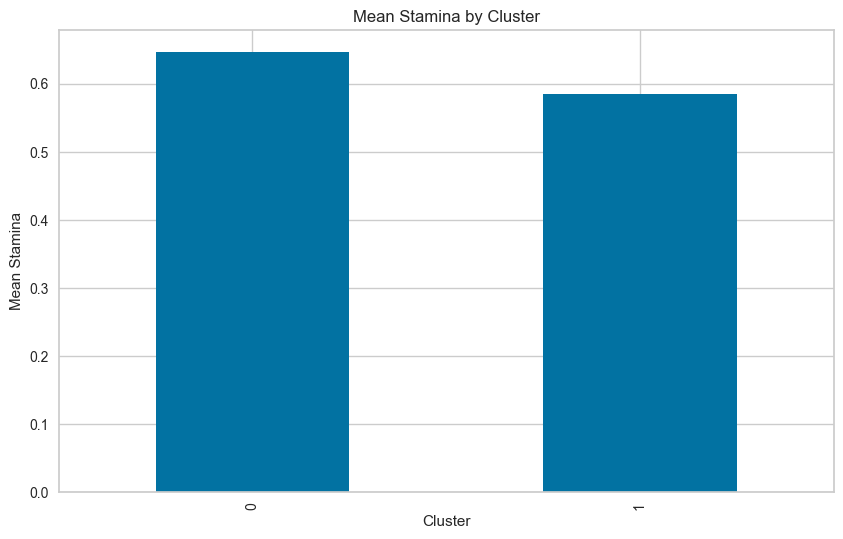

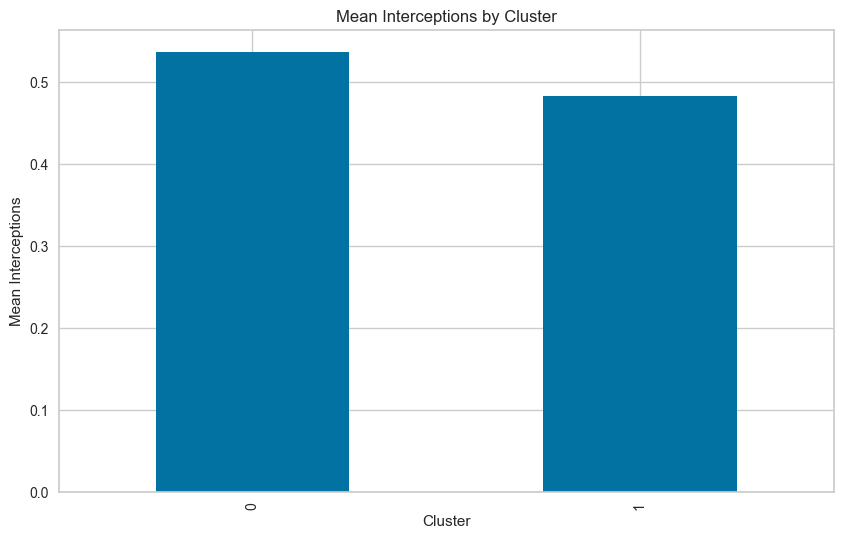

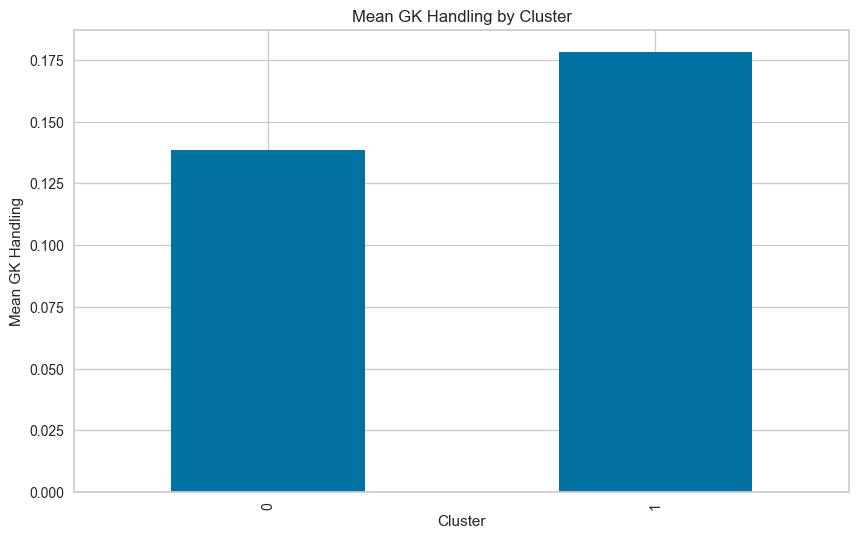

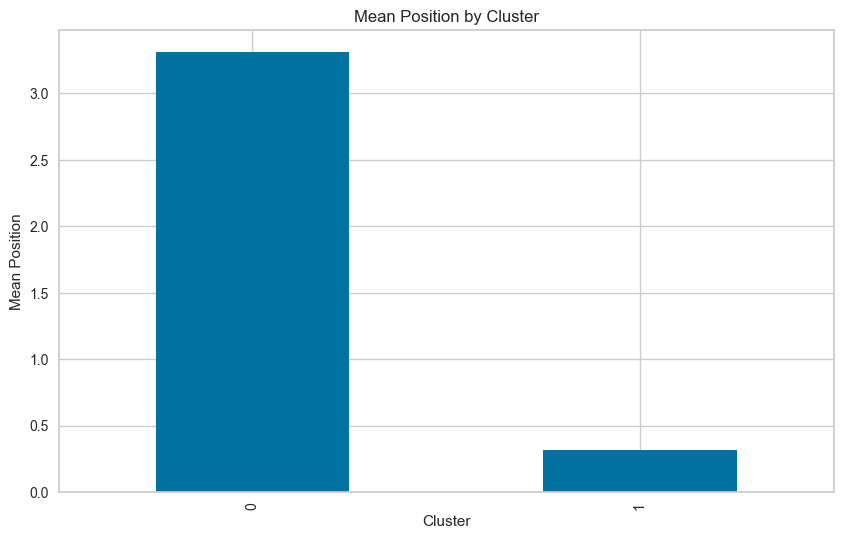

In [269]:
for column in df_std_num.columns:
    plt.figure()
    grouped_df[column].plot(kind='bar', figsize=(10, 6))
    plt.title(f"Mean {column} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(f"Mean {column}")
    plt.show()